In [2]:
from dlisio import dlis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os
from pathlib import Path
import traceback
import glob
import sys

pd.set_option('display.max_rows', 50)


# extracting lab 

In [3]:
# loading lab_data from an Excel file
name = 'HRDH_1867'
lab_data = pd.read_excel("../HRDH_LAB_DATA.xlsx", sheet_name=name, index_col='Depth_ft')

lab_data


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerit e,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectit e,...,XRD_Dickite,XRD_Chlorit e,XRD_Mixed Clay,XRD_Anhydrit e,XRD_Gypsum,XRD_Pyrite,XRD_Anatase,XRD_Iron,XRD_Halite,XRD_Hematit e
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14859,1,0,0,0,0.0,95.4,0,0.0,3.4,0,...,0.0,0.5,0,0,0,0,0.3,0,0.4,0
14859,2,0,0,0,0.0,90.6,0,0.0,8.8,0,...,0.0,0.2,0,0,0,0,0.0,0,0.4,0
14860,3,0,0,0,0.0,88.0,9,9.0,10.0,0,...,0.0,0.7,0,0,0,0,0.3,0,1.0,0
14872,4,0,0,0,0.0,74.1,0,0.0,23.5,0,...,0.0,2.4,0,0,0,0,0.0,0,0.0,0
14872,5,0,0,0,0.0,75.0,0,0.0,23.0,0,...,0.0,2.0,0,0,0,0,0.0,0,0.0,0
14872,6,0,0,0,0.0,85.0,0,0.0,13.5,0,...,0.0,1.5,0,0,0,0,0.0,0,0.0,0
14895,7,0,0,0,0.0,99.0,0,0.0,0.7,0,...,0.0,0.3,0,0,0,0,0.0,0,0.0,0
14895,8,0,0,0,0.0,99.4,0,0.0,0.1,0,...,0.0,0.5,0,0,0,0,0.0,0,0.0,0
14913,9,0,0,0,0.0,98.9,0,0.0,0.7,0,...,0.0,0.4,0,0,0,0,0.0,0,0.0,0


In [4]:
# convert data types to float
lab_data = lab_data.apply(pd.to_numeric, errors='coerce')


print("\n📋 DATAFRAME STRUCTURE:")
print(f"Index: {lab_data.index.name} (shape: {lab_data.index.shape})")
print(f"Columns: {list(lab_data.columns)} (shape: {lab_data.shape},)")
# print(f"Data types:\n{lab_data.info()}\n")


lab_data


📋 DATAFRAME STRUCTURE:
Index: Depth_ft (shape: (21,))
Columns: ['Sample_ID', 'XRD_Calcite', 'XRD_Dolomite', 'XRD_Ankerit e', 'XRD_Siderite', 'XRD_Quartz', 'XRD_Plagioclase', 'XRD_K-Feldspar', 'XRD_Illite/Mica', 'XRD_Smectit e', 'XRD_Kaolinit e', 'XRD_Dickite', 'XRD_Chlorit e', 'XRD_Mixed Clay', 'XRD_Anhydrit e', 'XRD_Gypsum', 'XRD_Pyrite', 'XRD_Anatase', 'XRD_Iron', 'XRD_Halite', 'XRD_Hematit e'] (shape: (21, 21),)


,Sample_ID,XRD_Calcite,XRD_Dolomite,XRD_Ankerit e,XRD_Siderite,XRD_Quartz,XRD_Plagioclase,XRD_K-Feldspar,XRD_Illite/Mica,XRD_Smectit e,...,XRD_Dickite,XRD_Chlorit e,XRD_Mixed Clay,XRD_Anhydrit e,XRD_Gypsum,XRD_Pyrite,XRD_Anatase,XRD_Iron,XRD_Halite,XRD_Hematit e
Depth_ft,,,,,,,,,,,,,,,,,,,,,
14859,1,0,0,0,0.0,95.4,0,0.0,3.4,0,...,0.0,0.5,0,0,0,0,0.3,0,0.4,0
14859,2,0,0,0,0.0,90.6,0,0.0,8.8,0,...,0.0,0.2,0,0,0,0,0.0,0,0.4,0
14860,3,0,0,0,0.0,88.0,9,9.0,10.0,0,...,0.0,0.7,0,0,0,0,0.3,0,1.0,0
14872,4,0,0,0,0.0,74.1,0,0.0,23.5,0,...,0.0,2.4,0,0,0,0,0.0,0,0.0,0
14872,5,0,0,0,0.0,75.0,0,0.0,23.0,0,...,0.0,2.0,0,0,0,0,0.0,0,0.0,0
14872,6,0,0,0,0.0,85.0,0,0.0,13.5,0,...,0.0,1.5,0,0,0,0,0.0,0,0.0,0
14895,7,0,0,0,0.0,99.0,0,0.0,0.7,0,...,0.0,0.3,0,0,0,0,0.0,0,0.0,0
14895,8,0,0,0,0.0,99.4,0,0.0,0.1,0,...,0.0,0.5,0,0,0,0,0.0,0,0.0,0
14913,9,0,0,0,0.0,98.9,0,0.0,0.7,0,...,0.0,0.4,0,0,0,0,0.0,0,0.0,0


# extracting log dlis

In [ ]:

sys.path.append(r"c:\Users\alghziy\Desktop\Analysis\colab\HRDH")
from Module import load_full_dsl_log, dlis_to_df, load_dlis_files_from_list

# Path to the DLIS log file 
# dir_path = r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1119_*"


# log_df, meta = load_full_dsl_log(
#     root_dir=dir_path,
#     frame_idx=0,
#     channels=None 
# )

"""
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0\5875\WL\Geoscience\LogEdit\Project\HRDH_1867_0_578_LogEdit\HRDH_1867_0_01FEB2017_ZDL_CN_DSL_GR_ML_BAT.dlis"
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0\5875\WL\Field\Deliverables\RUN2\DSL_Deliverables\HRDH_1867_0_01FEB_2017_DSL_GR_BAT.dlis"
"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0\5875\WL\Field\Delv_Frpm_Petrolink\R2\HRDH_1867_0_01FEB2017_ZDL_CN_DSL_GR_ML_BAT.dlis"
"""
# put this in a list
dlis_file_paths = [
    Path(r"\\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0\5875\WL\Field\Deliverables\RUN2\DSL_Deliverables\HRDH_1867_0_01FEB_2017_DSL_GR_BAT.dlis")]

log_df, meta = load_dlis_files_from_list(dlis_file_paths)

# Display summary
print(f"\n📊 LOADING SUMMARY:")
# print(f"   • Files found: {meta['summary']['total_files_found']}")
# print(f"   • DSL files: {meta['summary']['dsl_files_found']}")
# print(f"   • Successfully loaded: {meta['summary']['files_loaded']}")
# print(f"   • Failed to load: {meta['summary']['files_failed']}")
# print(f"   • Final shape: {meta['summary']['final_shape']}")

if not log_df.empty:
    print(f"   • Depth range: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
    print(f"   • Available channels: {list(log_df.columns)}")
else:
    print("   • No data loaded - check errors above")

log_df    

🔍 LOADING 1 DLIS FILES FROM LIST

📋 STEP 1: VALIDATING FILE PATHS
------------------------------
✅  1. HRDH_1867_0_01FEB_2017_DSL_GR_BAT.dlis (0.5 MB)

📊 VALIDATION SUMMARY:
   • Valid files: 1
   • Invalid files: 0

🔧 STEP 2: LOADING DLIS FILES
------------------------------

📁 Loading file 1/1: HRDH_1867_0_01FEB_2017_DSL_GR_BAT.dlis
🔍 STEP 1: FILE VALIDATION
✅ File found: HRDH_1867_0_01FEB_2017_DSL_GR_BAT.dlis
   • Size: 0.5 MB
   • Path: \\bhidhares01\GROUPS\Daleelah_Interns\2025 interns\Ziyad alghamdi\transtion_minerals\Log Data\HRDH_1867_0\5875\WL\Field\Deliverables\RUN2\DSL_Deliverables\HRDH_1867_0_01FEB_2017_DSL_GR_BAT.dlis

🔍 STEP 2: DLIS FILE LOADING
✅ DLIS file loaded successfully
   • Number of logical files: 1
   • Using logical file: unnamed

🔍 STEP 3: FRAME VALIDATION
✅ Found 1 frame(s)
   • Frame 0: 0_250000B0
✅ Selected frame 0: 0_250000B0

🔍 STEP 4: CHANNEL ANALYSIS
✅ Found 9 channels:
    1. TDEP            | 0.250000 ft frame 0 depth      | Dim: [1] | Units: ft
    2

,FRAMENO,GRSLC,KC,KTHC,RTHKC,RTHUC,RUKC,THC,UC
TDEP,,,,,,,,,
14305.00,1,12.777100,0.0001,0.003600,2.0541,0.0001,20982.417969,0.0002,2.0982
14305.25,2,11.209900,0.2729,7.510700,2.9790,0.9751,3.055100,0.8130,0.8338
14305.50,3,11.759300,0.1451,3.973900,1.9668,0.1709,11.510700,0.2853,1.6700
14305.75,4,12.917400,0.1604,4.527000,1.5382,0.1447,10.632400,0.2468,1.7057
14306.00,5,13.176100,0.1796,4.872100,1.2611,0.1310,9.624500,0.2265,1.7283
...,...,...,...,...,...,...,...,...,...
15819.00,6057,100.573097,2.7353,77.313301,3.4494,1.8041,1.912000,9.4351,5.2299
15819.25,6058,102.523499,2.6983,77.320900,3.5208,1.6935,2.079100,9.5003,5.6100
15819.50,6059,103.608299,2.6098,75.906799,3.7267,1.5844,2.352100,9.7261,6.1385


In [6]:
# You now have a complete log dataset:
print(f"📊 Final log data: {log_df.shape}")
print(f"📏 Depth coverage: {log_df.index.min():.1f} - {log_df.index.max():.1f} ft")
print(f"🔍 Available channels: {len(log_df.columns)} {list(log_df.columns)}")

📊 Final log data: (6061, 9)
📏 Depth coverage: 14305.0 - 15820.0 ft
🔍 Available channels: 9 ['FRAMENO', 'GRSLC', 'KC', 'KTHC', 'RTHKC', 'RTHUC', 'RUKC', 'THC', 'UC']


# cleaning log

In [7]:

# -999.25 are usually null values inside dlis files
null_values = -999.25

# Replace -999.25 with NaN FIRST
log_df_clean = log_df.replace(null_values, np.nan)
log_df_clean




,FRAMENO,GRSLC,KC,KTHC,RTHKC,RTHUC,RUKC,THC,UC
TDEP,,,,,,,,,
14305.00,1,12.777100,0.0001,0.003600,2.0541,0.0001,20982.417969,0.0002,2.0982
14305.25,2,11.209900,0.2729,7.510700,2.9790,0.9751,3.055100,0.8130,0.8338
14305.50,3,11.759300,0.1451,3.973900,1.9668,0.1709,11.510700,0.2853,1.6700
14305.75,4,12.917400,0.1604,4.527000,1.5382,0.1447,10.632400,0.2468,1.7057
14306.00,5,13.176100,0.1796,4.872100,1.2611,0.1310,9.624500,0.2265,1.7283
...,...,...,...,...,...,...,...,...,...
15819.00,6057,100.573097,2.7353,77.313301,3.4494,1.8041,1.912000,9.4351,5.2299
15819.25,6058,102.523499,2.6983,77.320900,3.5208,1.6935,2.079100,9.5003,5.6100
15819.50,6059,103.608299,2.6098,75.906799,3.7267,1.5844,2.352100,9.7261,6.1385


In [8]:
# DEPTH ANALYSIS: Compare sampling characteristics between log and lab data
print("=" * 50)

print("Log depths summary:")
print(f"Count: {len(log_df_clean.index)}")  
print(f"Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft\n")  
log_step = np.diff(log_df_clean.index).mean()  
print(f"Depth step (mean): {log_step:.2f} ft \nMin Step: {np.diff(log_df_clean.index).min():.2f} \nMax Step: {np.diff(log_df_clean.index).max():.2f}")  


print("=" * 50)


print("Lab depths summary:")
print(f"Count: {len(lab_data.index)}") 
print(f"Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft\n")  
lab_step = np.diff(lab_data.index).mean()  
print(f"Depth step (mean): {lab_step:.2f} ft \nMin Step: {np.diff(lab_data.index).min():.2f} \nMax Step: {np.diff(lab_data.index).max():.2f}")  


Log depths summary:
Count: 6061
Range: 14305.0 - 15820.0 ft

Depth step (mean): 0.25 ft 
Min Step: 0.25 
Max Step: 0.25
Lab depths summary:
Count: 21
Range: 14859.0 - 15025.0 ft

Depth step (mean): 8.30 ft 
Min Step: 0.00 
Max Step: 73.00


# Log MISSING DATA SUMMARY

In [9]:
#Missing Data Summary for log data
# Calculate missingness summary
null_pct = log_df_clean.isna().mean() * 100

# Show all columns with their percentages
missing_cols = null_pct.sort_values(ascending=False)

# Show aggregate summary statistics for many columns
print("🔍 MISSING DATA SUMMARY:")
print("=" * 50)
print(f"Log DATASET: {log_df_clean.shape[0]} samples × {log_df_clean.shape[1]} curves")

print(f"Total columns: {len(null_pct)}")
print(f"Columns with missing data: {len(missing_cols)}")
print(f"Max missing %: {null_pct.max():.1f}%")
print(f"Avg missing %: {null_pct.mean():.1f}%")

# Quick check for duplicates
# print("\n🔍 DUPLICATE DEPTH CHECK:")
# print(f"Log duplicates: {log_df_clean.index.duplicated().sum()}")
# print(f"Lab duplicates: {lab_data.index.duplicated().sum()}")

# # Show unique vs total counts
# print(f"\nLog depths - Total: {len(log_df_clean)}, Unique: {log_df_clean.index.nunique()}")
# print(f"Lab depths - Total: {len(lab_data)}, Unique: {lab_data.index.nunique()}")

print("=" * 50)


# Show detailed breakdown for all columns
# for col, pct in missing_cols.items():
#     count = log_df_clean[col].isna().sum()
#     print(f"• {col:<20}: {pct:>6.1f}% ({count} missing)")




🔍 MISSING DATA SUMMARY:
Log DATASET: 6061 samples × 9 curves
Total columns: 9
Columns with missing data: 9
Max missing %: 0.0%
Avg missing %: 0.0%


# OVERLAP

In [10]:
#   OVERLAP ANALYSIS - 
print("🔧  OVERLAP ZONE ANALYSIS:")
print("=" * 50)

# 1.
print(f"📏  Depth Ranges:")
print(f"Log Range: {log_df_clean.index.min():.1f} - {log_df_clean.index.max():.1f} ft")  
print(f"Lab Range: {lab_data.index.min():.1f} - {lab_data.index.max():.1f} ft")  

# Calculate overlap zone boundaries (unchanged)
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start

print(f"Overlap Range: {overlap_start:.1f} - {overlap_end:.1f} ft")
print(f"Span of overlap: {overlap_span:.1f} ft")

# Get samples in overlap zone (using different variable names to avoid confusion)
log_overlap = log_df_clean[(log_df_clean.index >= overlap_start) & (log_df_clean.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

# 2. FIX: Correct min/max bug in step statistics
if len(log_overlap) > 1:
    log_step_overlap = np.diff(log_overlap.index)
    print(f"\n✅ CORRECTED LOG STEP IN OVERLAP:")
    print(f"Step (mean): {log_step_overlap.mean():.2f} ft")
    print(f"Step Min: {log_step_overlap.min():.2f} ft")
    print(f"Step Max: {log_step_overlap.max():.2f} ft")  # ✅ FIXED: was .min()

if len(lab_overlap) > 1:
    lab_step_overlap = np.diff(lab_overlap.index)
    print(f"\n✅ CORRECTED LAB STEP IN OVERLAP:")
    print(f"Step (mean): {lab_step_overlap.mean():.2f} ft")
    print(f"Step Min: {lab_step_overlap.min():.2f} ft")
    print(f"Step Max: {lab_step_overlap.max():.2f} ft")  # ✅ FIXED: was .min()

print(f"\n📊 OVERLAP SUMMARY:")
print(f"Log samples in overlap: {len(lab_overlap):,}")
print(f"Lab samples in overlap: {len(lab_overlap)}")
print("=" * 50)

🔧  OVERLAP ZONE ANALYSIS:
📏  Depth Ranges:
Log Range: 14305.0 - 15820.0 ft
Lab Range: 14859.0 - 15025.0 ft
Overlap Range: 14859.0 - 15025.0 ft
Span of overlap: 166.0 ft

✅ CORRECTED LOG STEP IN OVERLAP:
Step (mean): 0.25 ft
Step Min: 0.25 ft
Step Max: 0.25 ft

✅ CORRECTED LAB STEP IN OVERLAP:
Step (mean): 8.30 ft
Step Min: 0.00 ft
Step Max: 73.00 ft

📊 OVERLAP SUMMARY:
Log samples in overlap: 21
Lab samples in overlap: 21


# join

In [11]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd
from Module import match_lab_to_log

tolerance_ft = 1

joined = match_lab_to_log(log_df_clean, lab_overlap, tol=tolerance_ft)

if len(joined) > 0:
    print(f"\n✅ Found {len(joined)} matches with {tolerance_ft} ft tolerance")
    
    # Show statistics
    print(f"\nMATCH STATISTICS:")
    print(f"Average distance: {joined['Distance'].mean():.3f} ft")
    print(f"Max distance: {joined['Distance'].max():.3f} ft")
    print(f"Exact matches: {(joined['Distance'] == 0).sum()}")
    print(f"Near matches: {(joined['Distance'] > 0).sum()}")
    
    # Save results for verification
    verification_df = joined[['Lab_Depth', 'Log_Depth', 'Distance']].copy()
    verification_df.to_csv('verification_matches.csv', index=False)
    print(f"\n💾 Saved verification data to 'verification_matches.csv'")
    
else:
    print(f"\n❌ No matches found with {tolerance_ft} ft tolerance")
    print("Trying with larger tolerance...")
    
    # Try with diffrent ft tolerance
    joined = match_lab_to_log(log_df_clean, lab_overlap, tol=1)

joined


FUNCTION START - INPUT VALIDATION:
Log DataFrame shape: (6061, 9)
Lab DataFrame shape: (21, 21)
After deduplication - Log: 6061, Lab: 9
Lab depths range: 14859.00 - 15025.00
Log depths range: 14305.00 - 15820.00
Tolerance: 1 ft
Valid matches found: 9/9
Min distance: 0.00 ft
Max distance: 0.00 ft

MATCH VERIFICATION:
   Match 1: Lab 14859.00 → Log 14859.00 (Δ0.00 ft)
   Match 2: Lab 14860.00 → Log 14860.00 (Δ0.00 ft)
   Match 3: Lab 14872.00 → Log 14872.00 (Δ0.00 ft)
   Match 4: Lab 14895.00 → Log 14895.00 (Δ0.00 ft)
   Match 5: Lab 14913.00 → Log 14913.00 (Δ0.00 ft)
   Match 6: Lab 14986.00 → Log 14986.00 (Δ0.00 ft)
   Match 7: Lab 14997.00 → Log 14997.00 (Δ0.00 ft)
   Match 8: Lab 15008.00 → Log 15008.00 (Δ0.00 ft)
   Match 9: Lab 15025.00 → Log 15025.00 (Δ0.00 ft)
Matched samples extracted: 9 pairs

✅ Found 9 matches with 1 ft tolerance

MATCH STATISTICS:
Average distance: 0.000 ft
Max distance: 0.000 ft
Exact matches: 9
Near matches: 0

💾 Saved verification data to 'verification_ma

,Lab_Depth,Lab_Sample_ID,Lab_XRD_Calcite,Lab_XRD_Dolomite,Lab_XRD_Ankerit e,Lab_XRD_Siderite,Lab_XRD_Quartz,Lab_XRD_Plagioclase,Lab_XRD_K-Feldspar,Lab_XRD_Illite/Mica,...,Log_GRSLC,Log_KC,Log_KTHC,Log_RTHKC,Log_RTHUC,Log_RUKC,Log_THC,Log_UC,Distance,Match_Type
0,14859,1,0,0,0,0.0,95.4,0,0.0,3.4,...,92.863403,1.6579,79.270500,8.172200,6.0446,1.3520,13.5485,2.2414,0.0,Exact
1,14860,3,0,0,0,0.0,88.0,9,9.0,10.0,...,78.137802,1.3499,64.245201,9.723200,5.3614,1.8136,13.1251,2.4481,0.0,Exact
2,14872,4,0,0,0,0.0,74.1,0,0.0,23.5,...,93.057297,2.0844,84.061996,6.394400,8.1759,0.7821,13.3286,1.6302,0.0,Exact
3,14895,7,0,0,0,0.0,99.0,0,0.0,0.7,...,25.399401,0.2462,20.066601,20.261499,6.4619,3.1356,4.9880,0.7719,0.0,Exact
4,14913,9,0,0,0,0.0,98.9,0,0.0,0.7,...,34.709099,0.4664,27.846399,14.014000,5.8169,2.4092,6.5356,1.1236,0.0,Exact
5,14986,11,0,0,0,1.4,96.8,0,0.0,1.8,...,46.299999,0.9738,37.849098,6.878900,4.1267,1.6669,6.6985,1.6232,0.0,Exact
6,14997,14,0,0,0,0.0,56.0,0,15.0,9.9,...,130.389893,3.1805,112.597801,5.948000,5.2541,1.1321,18.9177,3.6006,0.0,Exact
7,15008,16,0,0,0,4.9,93.4,0,0.0,0.8,...,166.450607,2.8262,125.313004,6.722300,2.7616,2.4342,18.9984,6.8795,0.0,Exact
8,15025,19,0,0,0,0.8,95.6,0,0.0,1.6,...,69.388397,1.1762,56.708099,8.117500,4.6147,1.7591,9.5477,2.0690,0.0,Exact


# DATA INTEGRATION ASSESSMENT

In [12]:
# COMPREHENSIVE DATA INTEGRATION ASSESSMENT
print("COMPREHENSIVE DATA INTEGRATION ASSESSMENT")
print("=" * 60)

# 1. Basic Statistics
lab_coverage = (len(joined) / len(lab_data)) * 100
log_coverage = (len(joined) / len(log_df_clean)) * 100

lab_span = lab_data.index.max() - lab_data.index.min()
log_span = log_df_clean.index.max() - log_df_clean.index.min()

matched_span = joined['Lab_Depth'].max() - joined['Lab_Depth'].min()
avg_depth_diff = abs(joined['Log_Depth'] - joined['Lab_Depth']).mean()

print(f"📊 DATA OVERVIEW:")
print(f"   • Lab samples: {len(lab_data)} | Log samples: {len(log_df_clean)}")
print(f"   • Matched pairs: {len(joined)}")
# print(f"   • Data ratio: 1 lab sample per {len(log_df_clean)//len(lab_data)} log samples") not usful

# 2. Coverage Analysis
print(f"\n📈 COVERAGE ANALYSIS:")
print(f"   • Lab utilization: {lab_coverage:.1f}% ({len(joined)}/{len(lab_data)})")
print(f"   • Log coverage: {log_coverage:.1f}% ({len(joined)}/{len(log_df_clean)})")

# 3. Depth Range Analysis
print(f"\n📏 DEPTH RANGE ANALYSIS:")
print(f"   • Lab data span: {lab_span:.1f} ft")
print(f"   • Log data span: {log_span:.1f} ft")
print(f"   • Matched (joined) span: {matched_span:.1f} ft")
print(f"   • Lab covers {(lab_span/log_span)*100:.1f}% of well depth")

# 4. Depth Accuracy
print(f"\n🎯 DEPTH ACCURACY:")
print(f"   • Average depth difference: {avg_depth_diff:.2f} ft")
print(f"   • Max depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).max():.2f} ft")
print(f"   • Min depth difference: {abs(joined['Log_Depth'] - joined['Lab_Depth']).min():.2f} ft")


# 6. Overlap Analysis
overlap_start = max(lab_data.index.min(), log_df_clean.index.min())
overlap_end = min(lab_data.index.max(), log_df_clean.index.max())
overlap_span = overlap_end - overlap_start
print(f"\n🔄 OVERLAP ZONE ANALYSIS:")
print(f"Overlap zone: {overlap_start:.1f} - {overlap_end:.1f} ft")

# Get samples in overlap zone - FIXED the bug
log_overlap = joined[(joined.index >= overlap_start) & (joined.index <= overlap_end)]
lab_overlap = lab_data[(lab_data.index >= overlap_start) & (lab_data.index <= overlap_end)]

print(f"Log samples in overlap: {len(log_overlap)}")
print(f"Lab samples in overlap: {len(lab_overlap)}")



# 7. Quality Assessment
print(f"\n⭐ QUALITY ASSESSMENT:")
if lab_coverage >= 80:
    print(f"   ✅ Lab utilization: EXCELLENT ({lab_coverage:.1f}%)")
elif lab_coverage >= 60:
    print(f"   ⚠️ Lab utilization: GOOD ({lab_coverage:.1f}%)")
else:
    print(f"   ❌ Lab utilization: POOR ({lab_coverage:.1f}%)")


if avg_depth_diff <= 1:
    print(f"   ✅ Depth accuracy: EXCELLENT ({avg_depth_diff:.2f} ft)")
elif avg_depth_diff <= 2:
    print(f"   ⚠️ Depth accuracy: GOOD ({avg_depth_diff:.2f} ft)")
else:
    print(f"   ❌ Depth accuracy: POOR ({avg_depth_diff:.2f} ft)")

# 8. Overall Assessment
excellent_count = sum([lab_coverage >= 80, log_coverage >= 50, matched_span >= 100, avg_depth_diff <= 1])
good_count = sum([60 <= lab_coverage < 80, 20 <= log_coverage < 50, 50 <= matched_span < 100, 1 < avg_depth_diff <= 2])

print(f"\n🏆 OVERALL ASSESSMENT:")
if excellent_count >= 3:
    print(f"   ✅ EXCELLENT - Ready for comprehensive analysis")
elif excellent_count + good_count >= 3:
    print(f"   ⚠️ GOOD - Suitable for limited analysis")
else:
    print(f"   ❌ POOR - Needs improvement before analysis")



print(f"\n📝 SUMMARY: Lab utilization is {lab_coverage:.1f}%, but only {log_coverage:.1f}% log coverage.")

COMPREHENSIVE DATA INTEGRATION ASSESSMENT
📊 DATA OVERVIEW:
   • Lab samples: 21 | Log samples: 6061
   • Matched pairs: 9

📈 COVERAGE ANALYSIS:
   • Lab utilization: 42.9% (9/21)
   • Log coverage: 0.1% (9/6061)

📏 DEPTH RANGE ANALYSIS:
   • Lab data span: 166.0 ft
   • Log data span: 1515.0 ft
   • Matched (joined) span: 166.0 ft
   • Lab covers 11.0% of well depth

🎯 DEPTH ACCURACY:
   • Average depth difference: 0.00 ft
   • Max depth difference: 0.00 ft
   • Min depth difference: 0.00 ft

🔄 OVERLAP ZONE ANALYSIS:
Overlap zone: 14859.0 - 15025.0 ft
Log samples in overlap: 0
Lab samples in overlap: 21

⭐ QUALITY ASSESSMENT:
   ❌ Lab utilization: POOR (42.9%)
   ✅ Depth accuracy: EXCELLENT (0.00 ft)

🏆 OVERALL ASSESSMENT:
   ❌ POOR - Needs improvement before analysis

📝 SUMMARY: Lab utilization is 42.9%, but only 0.1% log coverage.


# Visualizations  

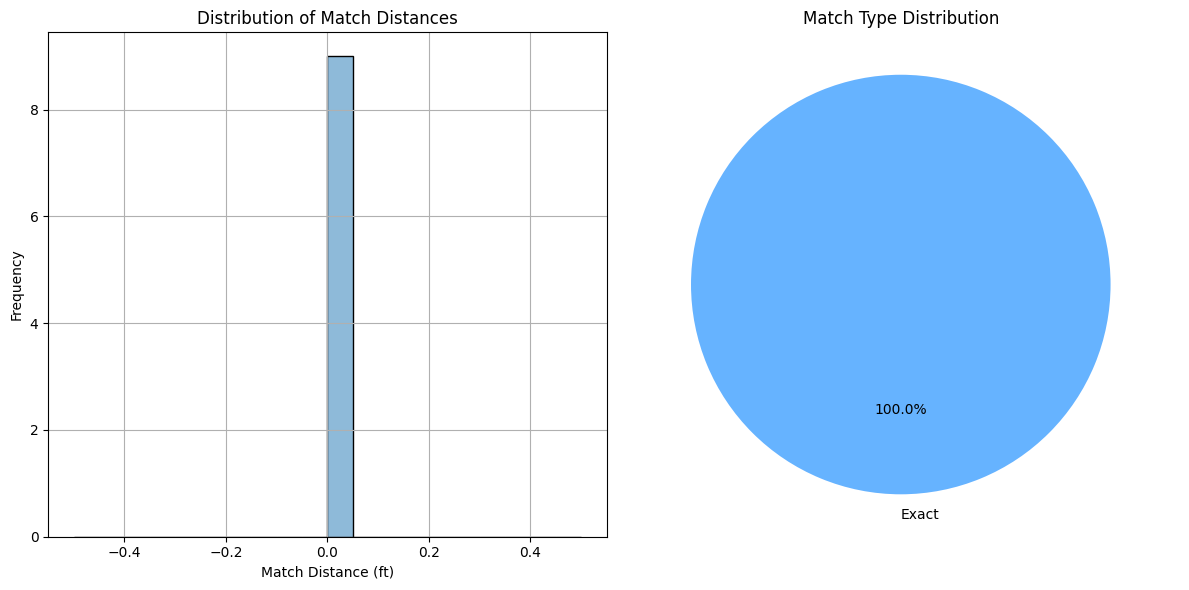

In [13]:
# Visualize the quality of matches
plt.figure(figsize=(12, 6))

# Left plot: Distance histogram
plt.subplot(1, 2, 1)
sns.histplot(joined['Distance'], bins=20, kde=True)
plt.xlabel('Match Distance (ft)')
plt.ylabel('Frequency')
plt.title('Distribution of Match Distances')
plt.grid(True)

# Right plot: Match types
plt.subplot(1, 2, 2)
match_counts = joined['Match_Type'].value_counts()
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'], startangle=90)
plt.axis('equal')
plt.title('Match Type Distribution')

plt.tight_layout()
plt.savefig('match_quality.png', dpi=300, bbox_inches='tight')
plt.show()

9 lab variables
Lab variables: ['Lab_XRD_Siderite', 'Lab_XRD_Quartz', 'Lab_XRD_Plagioclase', 'Lab_XRD_K-Feldspar', 'Lab_XRD_Illite/Mica', 'Lab_XRD_Dickite', 'Lab_XRD_Chlorit e', 'Lab_XRD_Anatase', 'Lab_XRD_Halite']
8 log variables


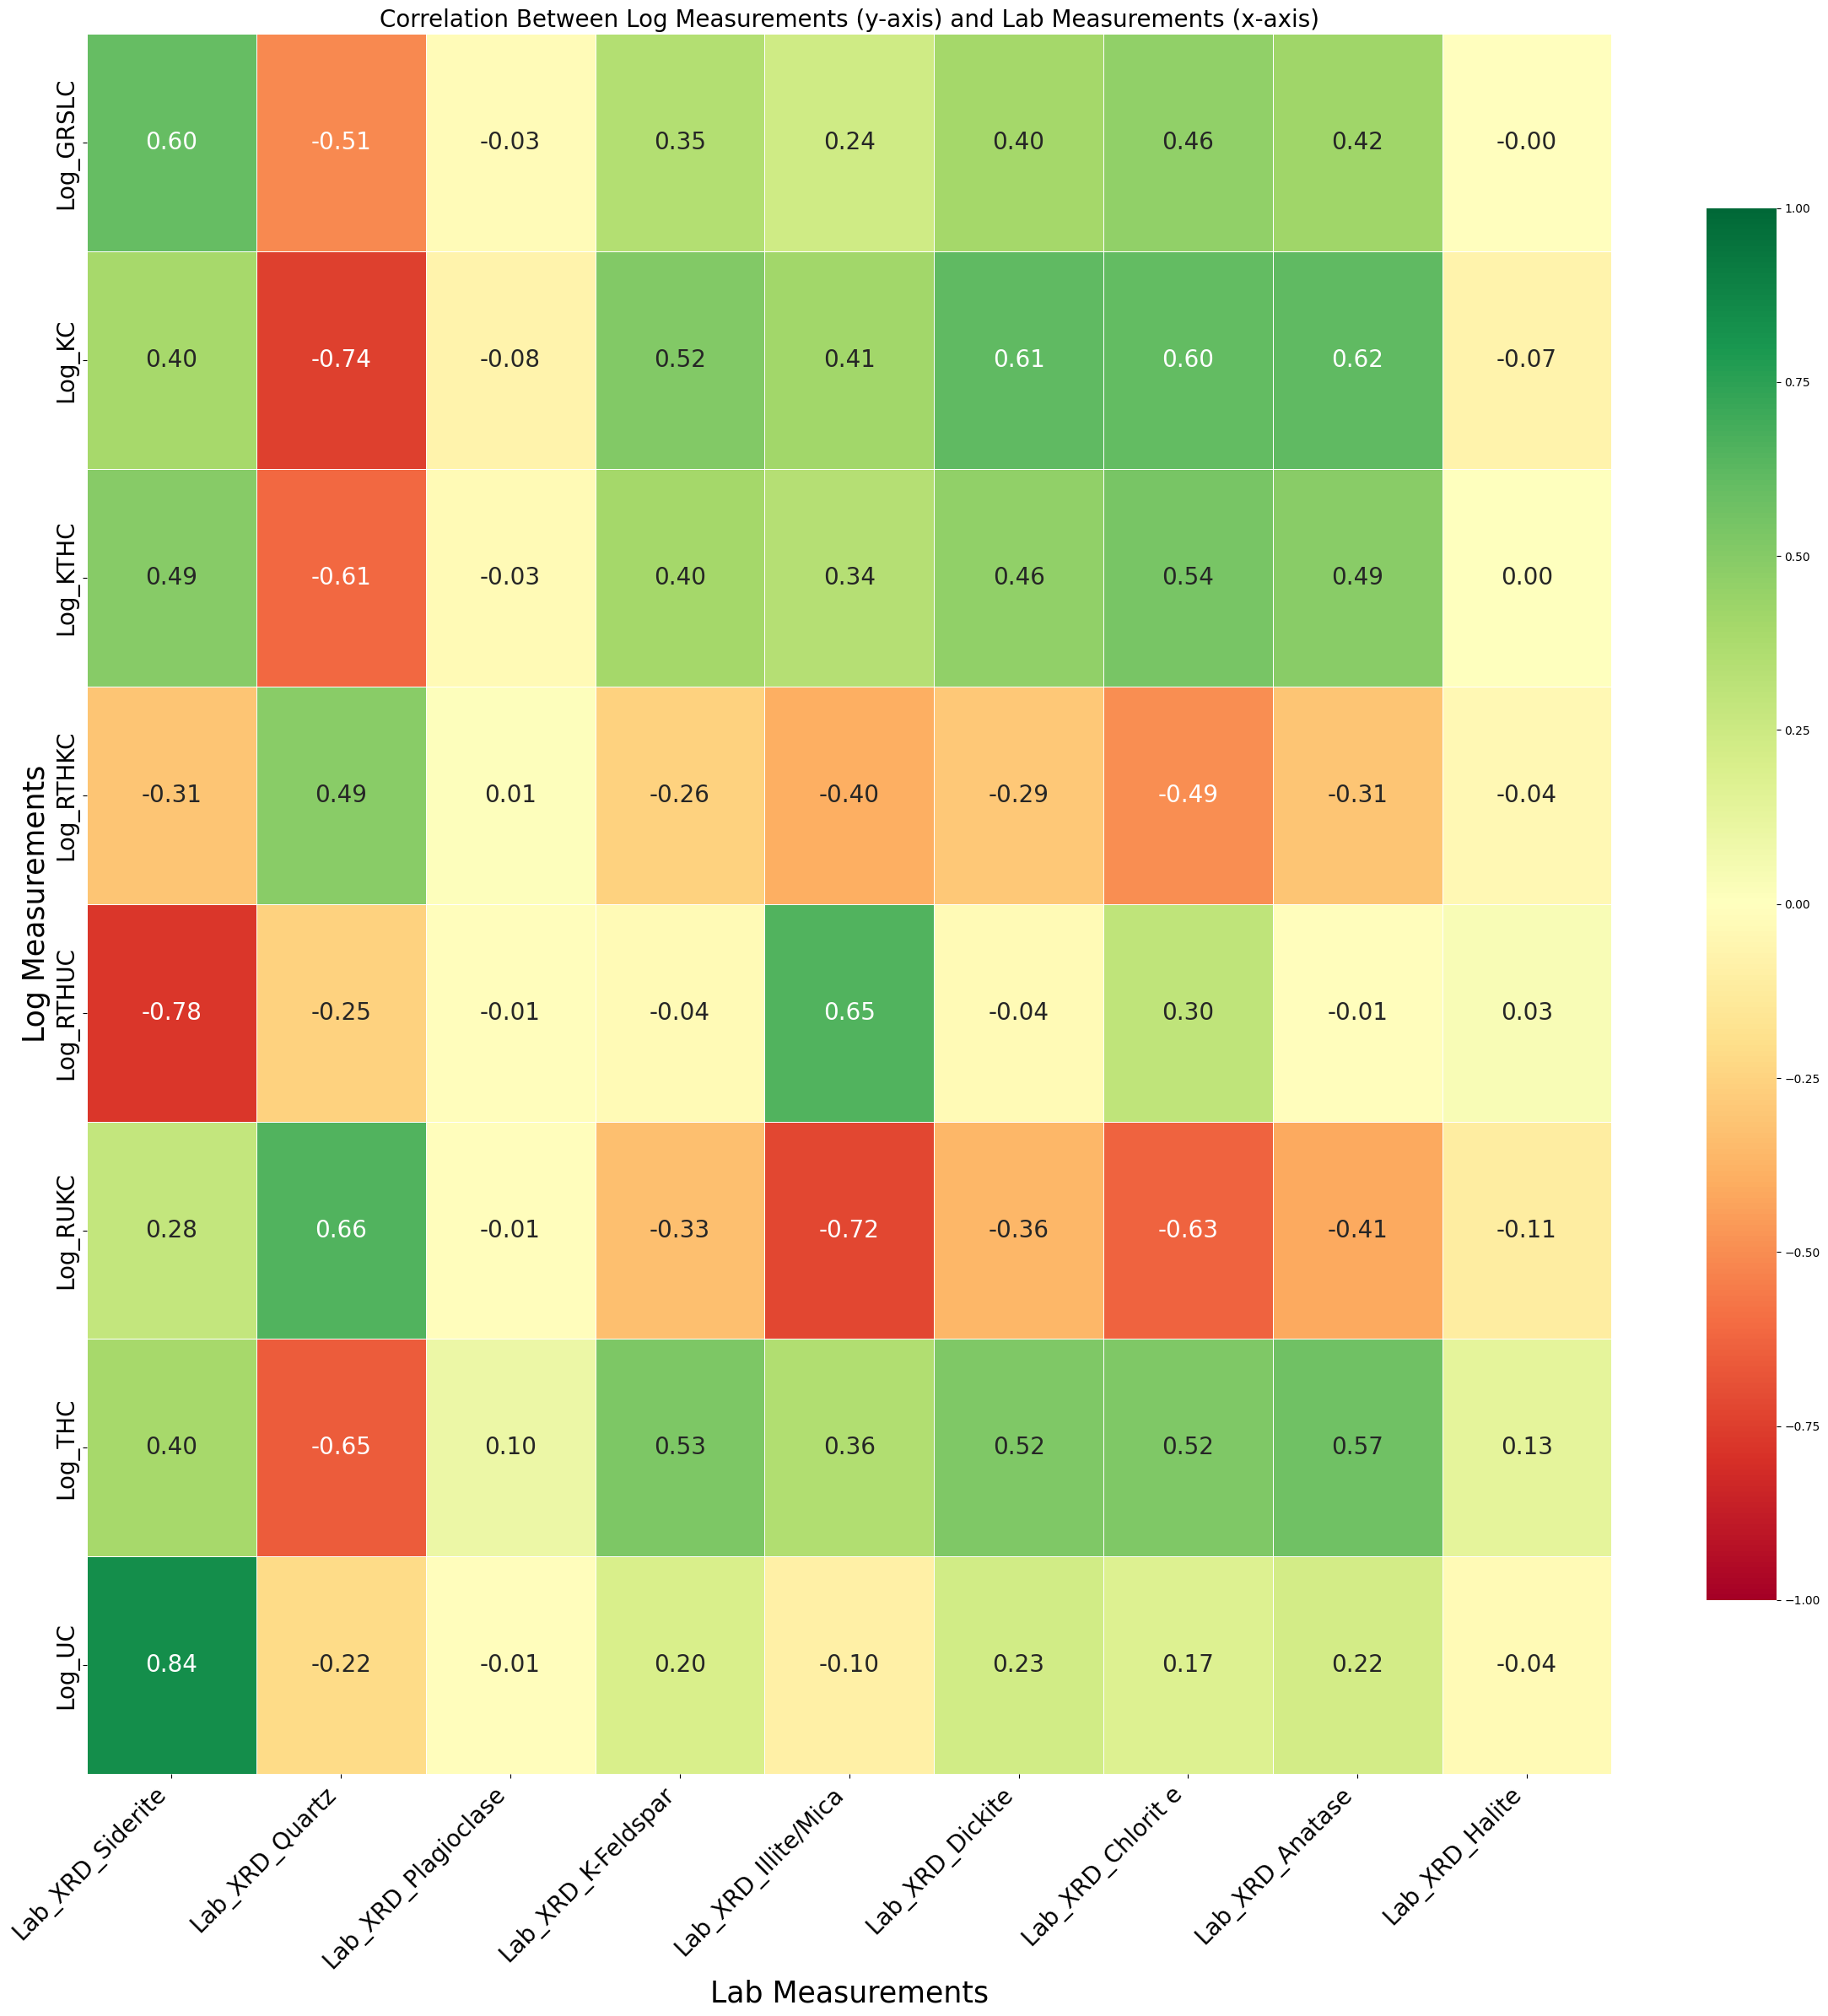

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for all lab measurement columns (excluding non-measurement columns)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]

# Filter for all log measurement columns (excluding non-measurement or auxiliary columns)
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Filter out columns where all values are 0
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]

# 31 - 10
print(len(lab_vars), "lab variables")
print("Lab variables:", lab_vars)
print(len(log_vars), "log variables")

# Compute correlation matrix (log variables as rows, lab variables as columns)
corr_matrix = joined[lab_vars + log_vars].corr().loc[log_vars, lab_vars]




# Create a larger figure for better readability
plt.figure(figsize=(24, 24))

# Plot the heatmap with rotated x-axis labels
sns.heatmap(corr_matrix, 
            annot=True,                  # Show correlation values
            cmap='RdYlGn',               # Use a diverging colormap
            vmin=-1, vmax=1,             # Fixed scale for correlation values
            linewidths=0.5,              # Add line separators
            fmt='.2f',                   # Format as 2 decimal places
            annot_kws={'size': 20},       # Smaller annotation font size
            cbar_kws={"shrink": 0.8})    # Adjust colorbar
            

#  labeling and styling
plt.title('Correlation Between Log Measurements (y-axis) and Lab Measurements (x-axis)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)      
plt.yticks(fontsize=20)                   
# Add clearer axis labels
plt.xlabel('Lab Measurements', fontsize=25, )
plt.ylabel('Log Measurements', fontsize=25, )

plt.tight_layout()
plt.savefig('correlation_heatmap_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
#  IMPROVED CORRELATION ANALYSIS - Replacing repetitive code blocks
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

def enhanced_correlation_analysis(data, log_vars, lab_vars, significance_level=0.05):
    """Enhanced correlation with multiple statistics and significance testing"""
    
    # Initialize results dictionary
    results = {
        'pearson_r': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'pearson_p': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'spearman_r': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'spearman_p': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=float),
        'n_samples': pd.DataFrame(index=log_vars, columns=lab_vars, dtype=int)
    }
    
    print("🔬 ENHANCED CORRELATION ANALYSIS:")
    print("=" * 40)
    
    significant_correlations = []
    
    for log_var in log_vars:
        for lab_var in lab_vars:
            # Get clean data pairs
            clean_data = data[[log_var, lab_var]].dropna()
            n = len(clean_data)
            
            if n < 3:  # Need minimum 3 points for correlation
                continue
                
            try:
                # Calculate Pearson correlation
                pearson_r, pearson_p = pearsonr(clean_data[log_var], clean_data[lab_var])
                
                # Calculate Spearman correlation (rank-based, more robust)
                spearman_r, spearman_p = spearmanr(clean_data[log_var], clean_data[lab_var])
                
                # Store results
                results['pearson_r'].loc[log_var, lab_var] = pearson_r
                results['pearson_p'].loc[log_var, lab_var] = pearson_p
                results['spearman_r'].loc[log_var, lab_var] = spearman_r
                results['spearman_p'].loc[log_var, lab_var] = spearman_p
                results['n_samples'].loc[log_var, lab_var] = n
                
                # Check for statistical significance and strong correlation
                if pearson_p <= significance_level and abs(pearson_r) >= 0.6:
                    significant_correlations.append({
                        'log_var': log_var,
                        'lab_var': lab_var,
                        'pearson_r': pearson_r,
                        'pearson_p': pearson_p,
                        'spearman_r': spearman_r,
                        'n_samples': n
                    })
                    
            except Exception as e:
                print(f"⚠️  Error calculating correlation for {log_var} vs {lab_var}: {e}")
                continue
    
    # Display significant correlations
    print(f"\n🎯 SIGNIFICANT STRONG CORRELATIONS (|r| ≥ 0.6, p ≤ {significance_level}):")
    if significant_correlations:
        for corr in sorted(significant_correlations, key=lambda x: abs(x['pearson_r']), reverse=True):
            print(f"   • {corr['log_var']} ↔ {corr['lab_var']}: "
                  f"r={corr['pearson_r']:.3f} (p={corr['pearson_p']:.3f}, n={corr['n_samples']})")
    else:
        print("   ❌ No significant strong correlations found")
    
    # Summary statistics
    all_r = results['pearson_r'].values.flatten()
    all_r = all_r[~pd.isna(all_r)]
    
    print(f"\n📊 CORRELATION SUMMARY:")
    print(f"   • Total correlations calculated: {len(all_r)}")
    print(f"   • Mean |r|: {np.abs(all_r).mean():.3f}")
    print(f"   • Strong correlations (|r| ≥ 0.6): {(np.abs(all_r) >= 0.6).sum()}")
    print(f"   • Moderate correlations (0.3 ≤ |r| < 0.6): {((np.abs(all_r) >= 0.3) & (np.abs(all_r) < 0.6)).sum()}")
    
    return results

# Filter variables (fix the repetitive variable filtering)
lab_vars = [col for col in joined.columns if col.startswith('Lab_') and 
           col not in ['Lab_Depth', 'Lab_Sample_ID']]
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# Remove zero-only columns
lab_vars = [col for col in lab_vars if not (joined[col] == 0).all()]
log_vars = [col for col in log_vars if not (joined[col] == 0).all()]

print(f"📋 Variables for analysis: {len(log_vars)} log vars, {len(lab_vars)} lab vars")

# Run enhanced correlation analysis
correlation_results = enhanced_correlation_analysis(joined, log_vars, lab_vars)

📋 Variables for analysis: 8 log vars, 9 lab vars
🔬 ENHANCED CORRELATION ANALYSIS:

🎯 SIGNIFICANT STRONG CORRELATIONS (|r| ≥ 0.6, p ≤ 0.05):
   • Log_UC ↔ Lab_XRD_Siderite: r=0.838 (p=0.005, n=9)
   • Log_RTHUC ↔ Lab_XRD_Siderite: r=-0.776 (p=0.014, n=9)
   • Log_KC ↔ Lab_XRD_Quartz: r=-0.745 (p=0.021, n=9)
   • Log_RUKC ↔ Lab_XRD_Illite/Mica: r=-0.721 (p=0.028, n=9)

📊 CORRELATION SUMMARY:
   • Total correlations calculated: 72
   • Mean |r|: 0.340
   • Strong correlations (|r| ≥ 0.6): 13
   • Moderate correlations (0.3 ≤ |r| < 0.6): 29


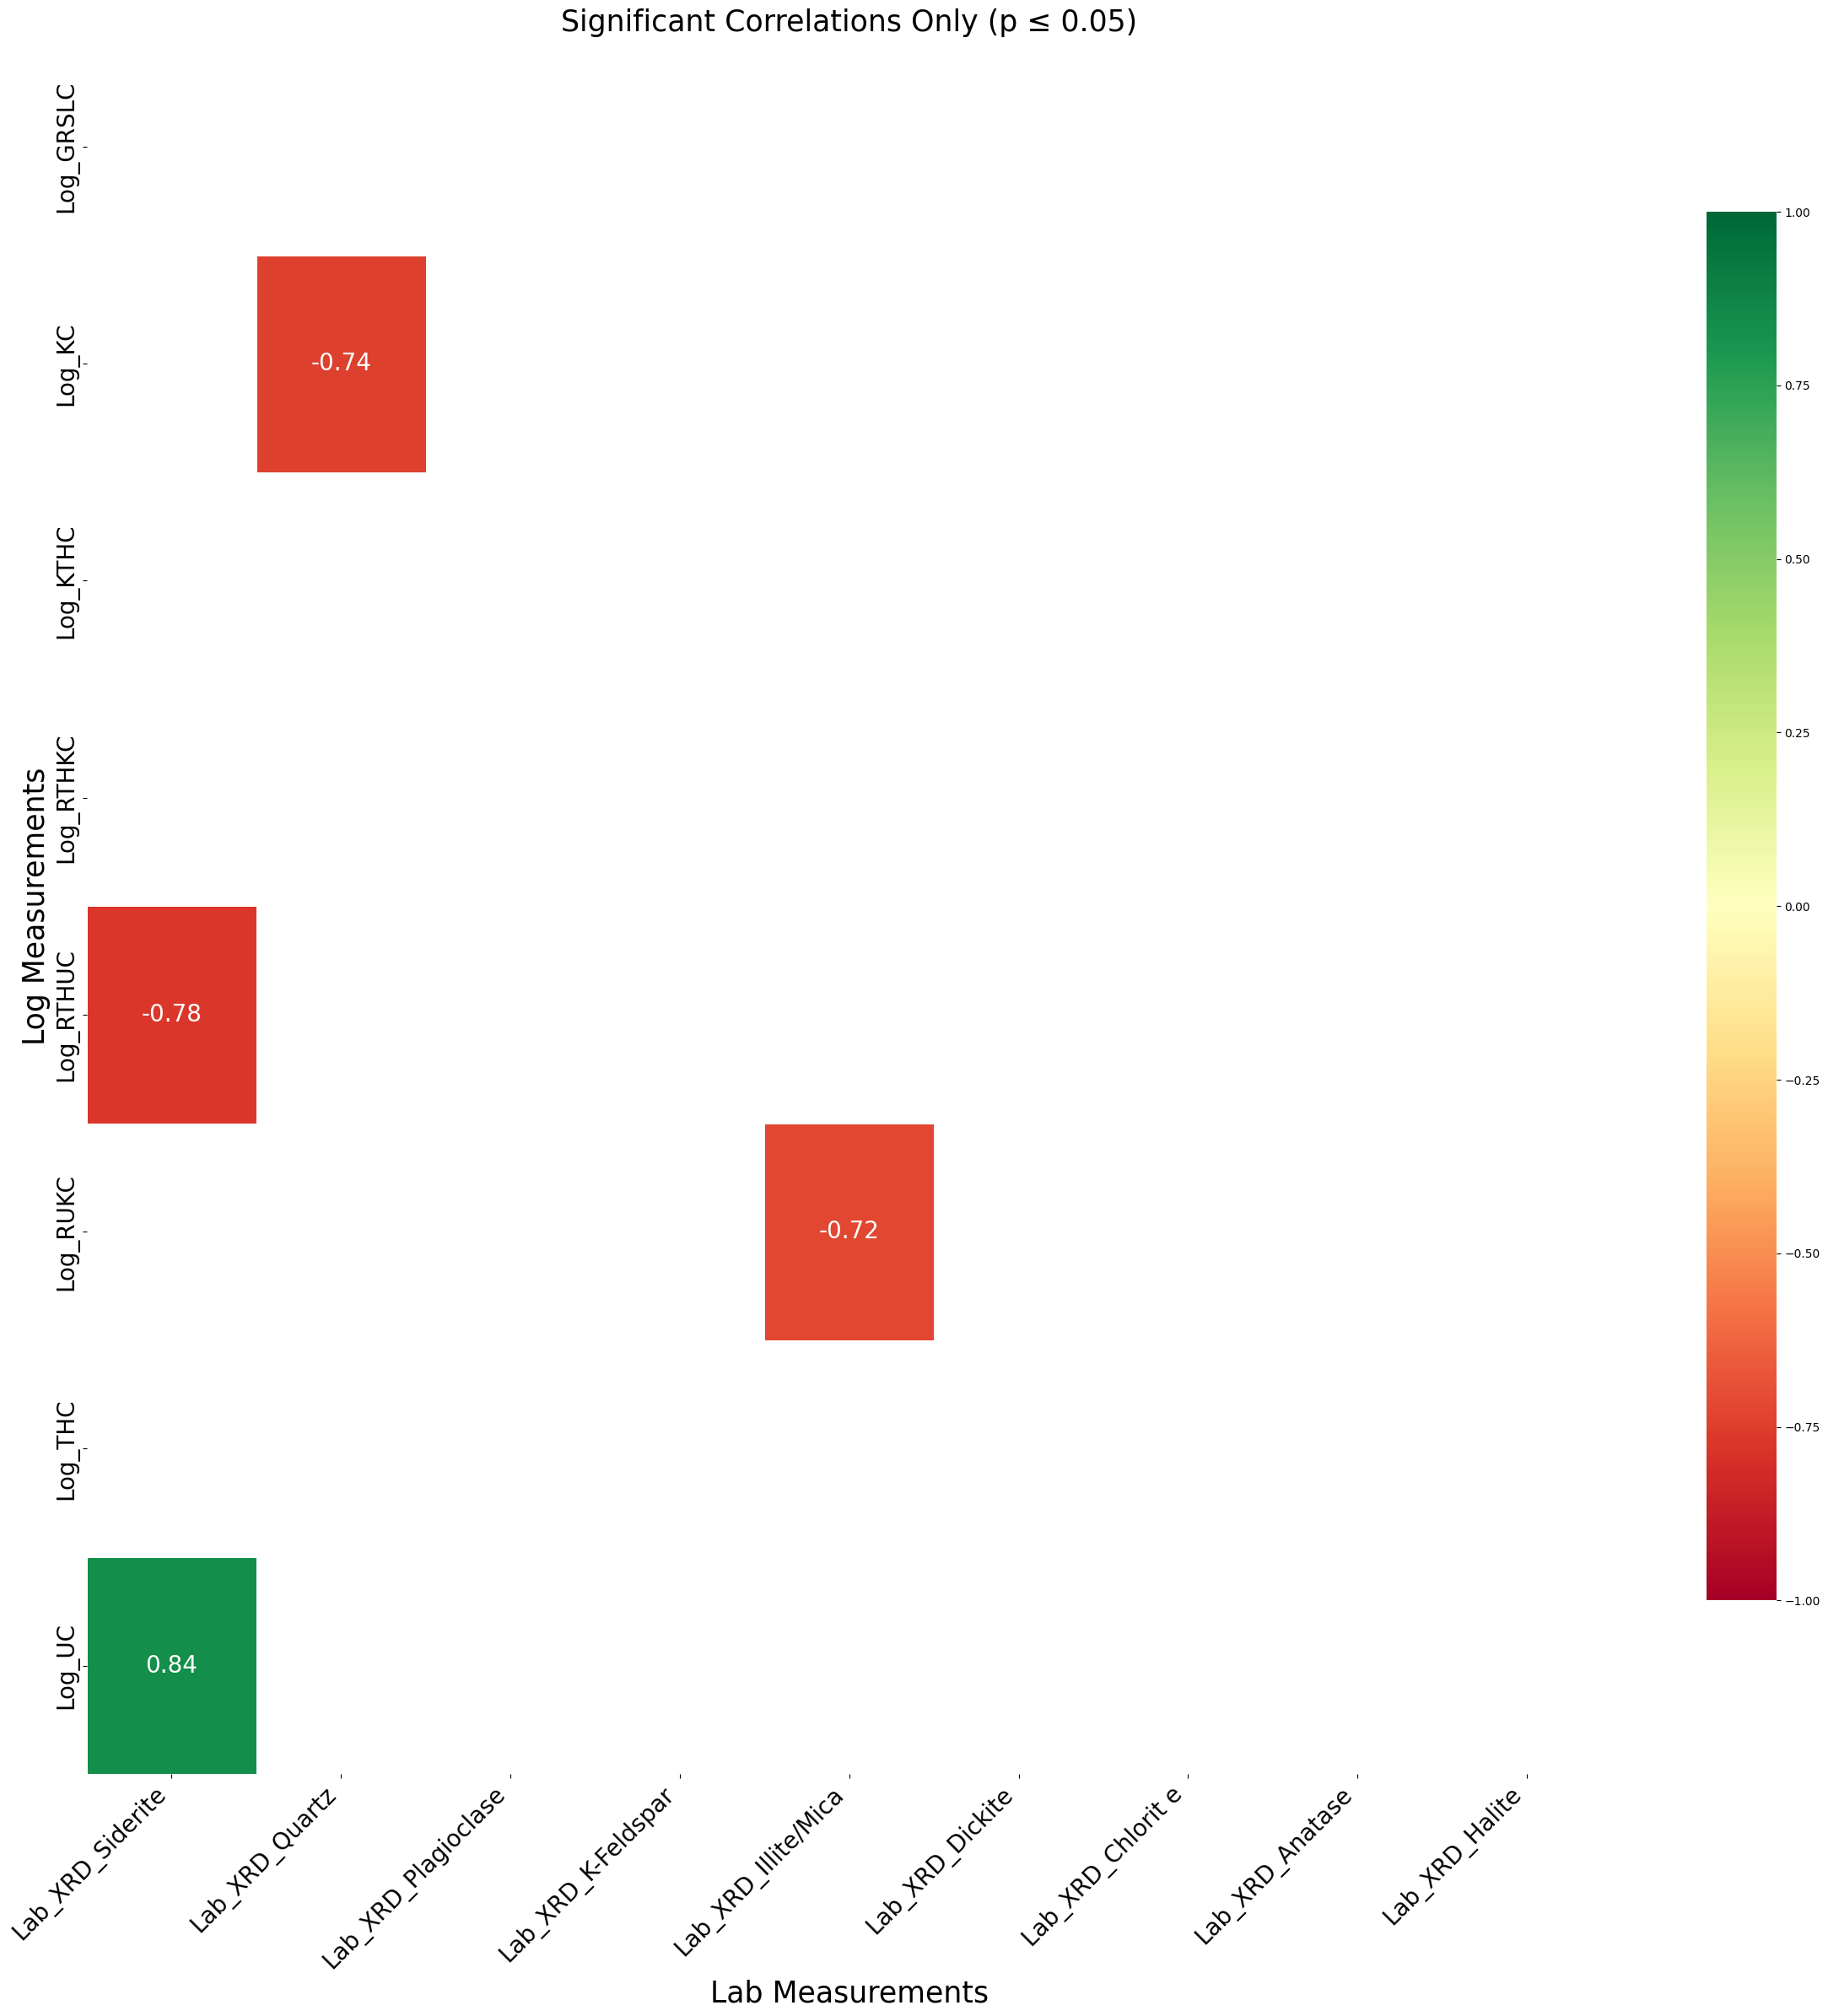


📊 CORRELATION HEATMAP SUMMARY:
   • Total correlations: 72
   • Significant correlations: 4
   • Significance rate: 5.6%

🎯 STRONGEST SIGNIFICANT CORRELATIONS:
   • Log_UC ↔ Lab_XRD_Siderite: r=0.838 (p=0.0048)
   • Log_RTHUC ↔ Lab_XRD_Siderite: r=-0.776 (p=0.0140)
   • Log_KC ↔ Lab_XRD_Quartz: r=-0.745 (p=0.0214)
   • Log_RUKC ↔ Lab_XRD_Illite/Mica: r=-0.721 (p=0.0285)


In [16]:
# CORRELATION HEATMAP - Using enhanced correlation results
def create_enhanced_correlation_heatmap(correlation_results, significance_level=0.05):
    """Create correlation heatmap with significance masking"""
    
    # Get correlation matrix and p-values
    corr_matrix = correlation_results['pearson_r']
    p_matrix = correlation_results['pearson_p']
    n_matrix = correlation_results['n_samples']
    
    # Create significance mask
    significance_mask = (p_matrix > significance_level) | pd.isna(p_matrix)
    
    # Create figure with subplots
    fig, ax1 = plt.subplots(figsize=(24,24))
    
    
    # Right plot: Only significant correlations
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='RdYlGn', 
                vmin=-1, vmax=1,
                linewidths=0.5,
                fmt='.2f',
                annot_kws={'size': 20},
                mask=significance_mask,  # Mask non-significant
                ax=ax1,
                cbar_kws={"shrink": 0.8})
    ax1.set_title(f'Significant Correlations Only (p ≤ {significance_level})', fontsize=25)
    ax1.set_xlabel('Lab Measurements', fontsize=25)
    ax1.set_ylabel('Log Measurements', fontsize=25)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=20)

    # Fix axis tick label formatting
    for ax in [ax1]:
        plt.sca(ax)
        plt.xticks(rotation=45, ha='right', fontsize=20)
        plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.savefig('enhanced_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    # Print summary of significant correlations
    significant_count = (~significance_mask).sum().sum()
    total_count = (~pd.isna(corr_matrix)).sum().sum()
    
    print(f"\n📊 CORRELATION HEATMAP SUMMARY:")
    print(f"   • Total correlations: {total_count}")
    print(f"   • Significant correlations: {significant_count}")
    print(f"   • Significance rate: {(significant_count/total_count)*100:.1f}%")
    
    # Find and display strongest correlations
    strong_correlations = []
    for i in corr_matrix.index:
        for j in corr_matrix.columns:
            r = corr_matrix.loc[i, j]
            p = p_matrix.loc[i, j]
            if not pd.isna(r) and not pd.isna(p) and abs(r) >= 0.6 and p <= significance_level:
                strong_correlations.append((i, j, r, p))
    
    if strong_correlations:
        print(f"\n🎯 STRONGEST SIGNIFICANT CORRELATIONS:")
        for log_var, lab_var, r, p in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
            print(f"   • {log_var} ↔ {lab_var}: r={r:.3f} (p={p:.4f})")
    else:
        print(f"\n❌ No strong significant correlations found (|r| ≥ 0.6, p ≤ {significance_level})")

# Create enhanced correlation heatmap if we have results
if 'correlation_results' in locals():
    create_enhanced_correlation_heatmap(correlation_results)

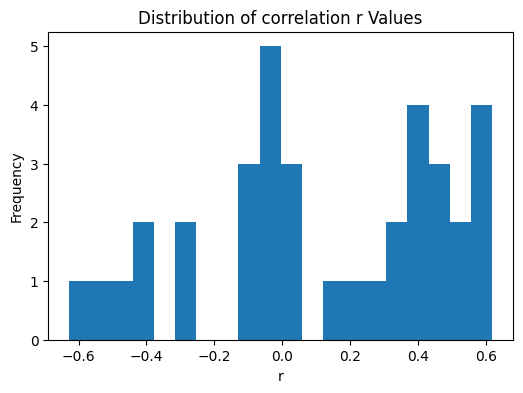

In [24]:
# Extract all unique r’s
vals = corr_matrix.values
mask = np.triu(np.ones_like(vals), k=1).astype(bool)
r_vals = vals[mask]

plt.figure(figsize=(6,4))
plt.hist(r_vals, bins=20)
plt.title("Distribution of correlation r Values")
plt.xlabel("r")
plt.ylabel("Frequency")
plt.show()


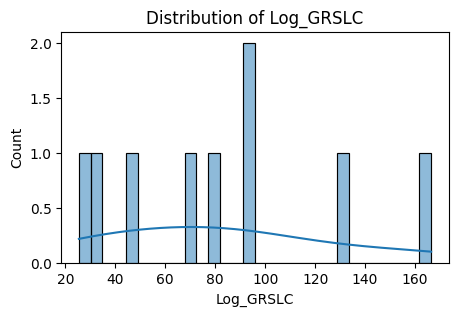

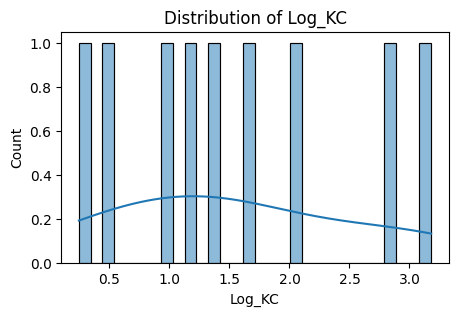

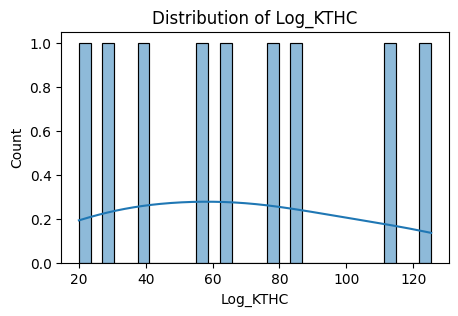

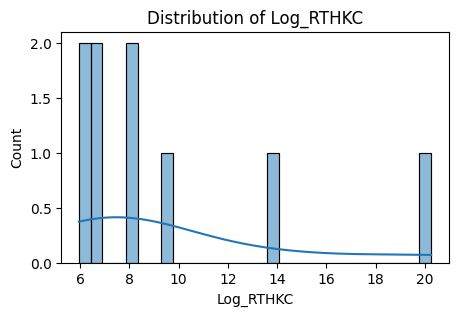

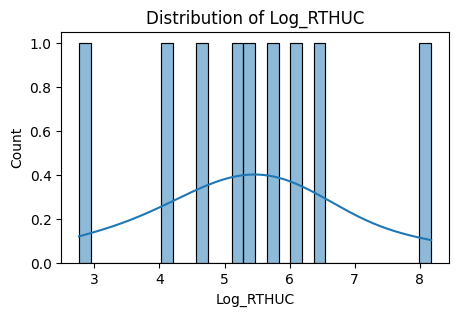

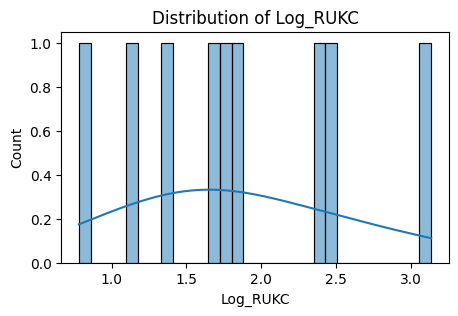

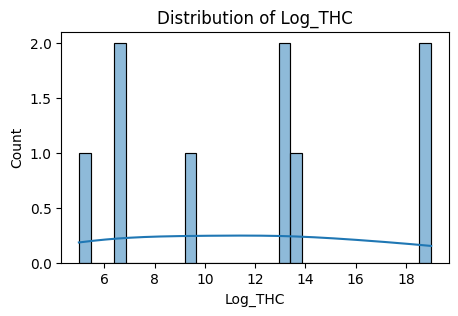

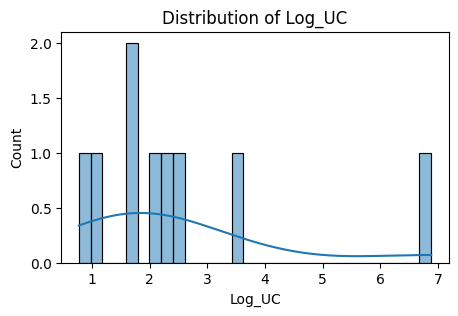

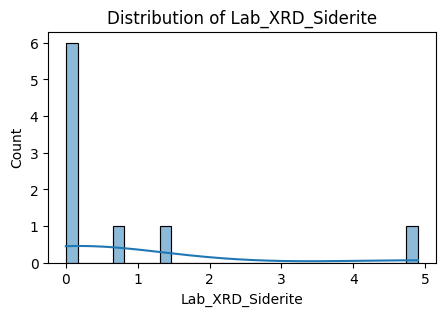

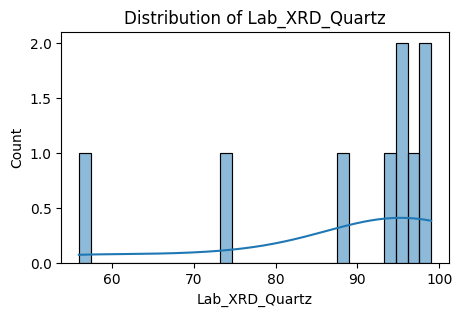

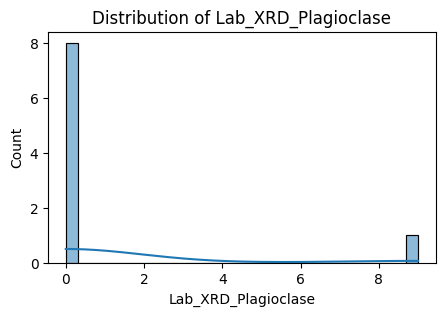

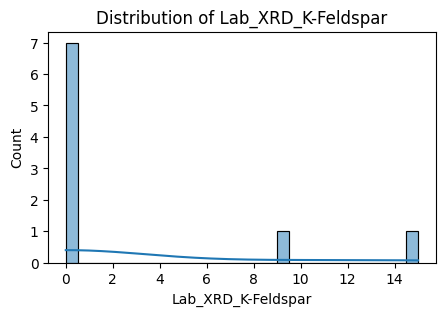

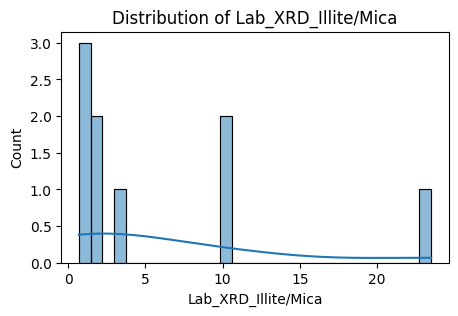

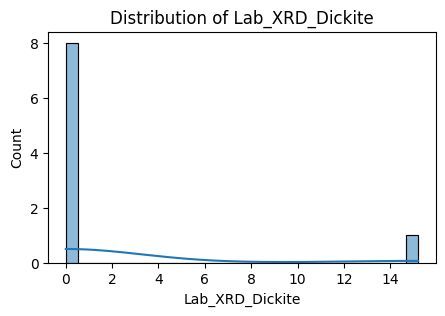

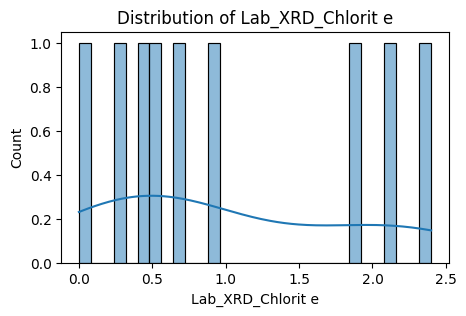

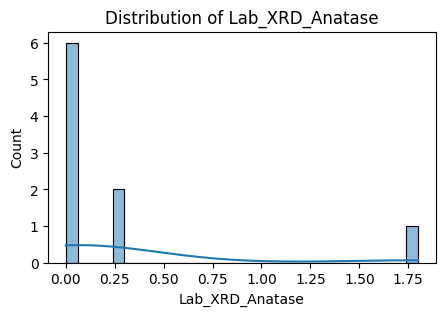

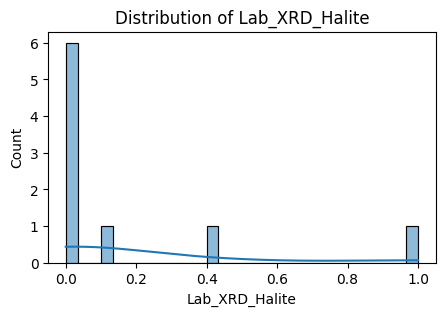

In [18]:
for var in log_vars + lab_vars:
    data = joined[var].dropna()
    plt.figure(figsize=(5,3))
    sns.histplot(data, bins=30, kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.show()

# stat

In [19]:
# ► 1a) Compute summary stats
stats = joined[log_vars + lab_vars].describe().T
stats['skew']    = joined[stats.index].skew()
stats['kurtosis']= joined[stats.index].kurtosis()

# ► 1b) Display top 10 for review
stats[['mean','50%','std','min','max','skew','kurtosis']]

,mean,50%,std,min,max,skew,kurtosis
Log_GRSLC,81.855103,78.137802,45.555038,25.399401,166.450607,0.664356,0.000863
Log_KC,1.551278,1.349900,0.998141,0.246200,3.180500,0.451932,-0.742831
Log_KTHC,67.550972,64.245201,36.430664,20.066601,125.313004,0.309354,-0.966801
Log_RTHKC,9.581333,8.117500,4.699707,5.948000,20.261499,1.820698,3.007372
Log_RTHUC,5.401978,5.361400,1.526616,2.761600,8.175900,0.085780,0.966835
Log_RUKC,1.831644,1.759100,0.728924,0.782100,3.135600,0.421140,-0.168350
Log_THC,11.743122,13.125100,5.181875,4.988000,18.998400,0.202481,-1.254114
Log_UC,2.487500,2.069000,1.838865,0.771900,6.879500,1.994038,4.491788
Lab_XRD_Siderite,0.788889,0.000000,1.620528,0.000000,4.900000,2.521365,6.618905
Lab_XRD_Quartz,88.577778,95.400000,14.461741,56.000000,99.000000,-1.809100,2.796589


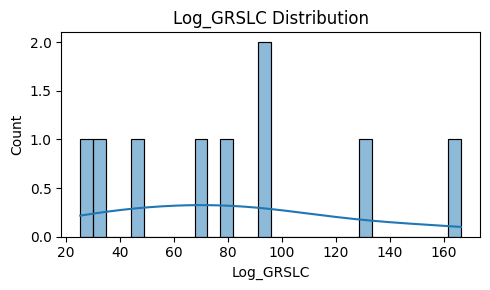

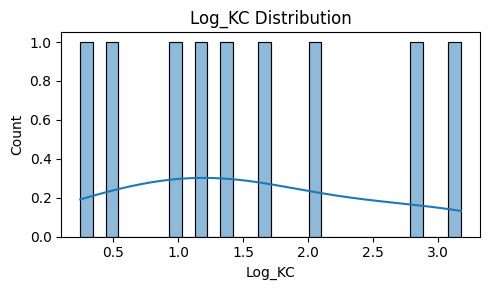

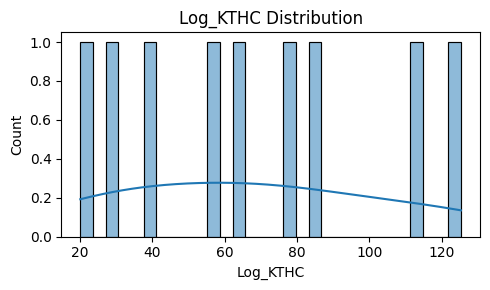

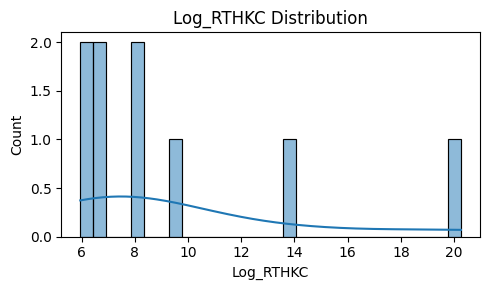

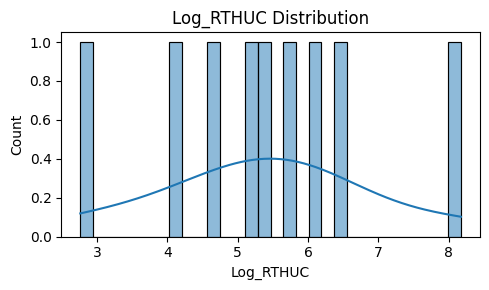

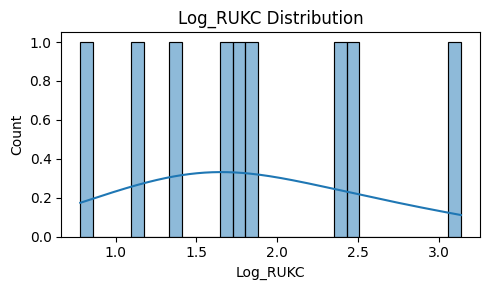

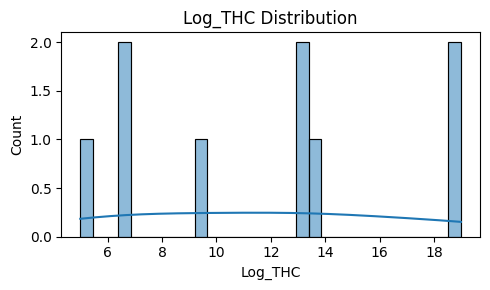

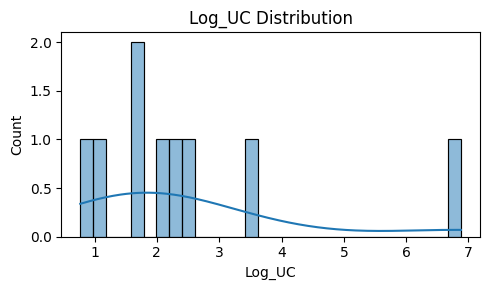

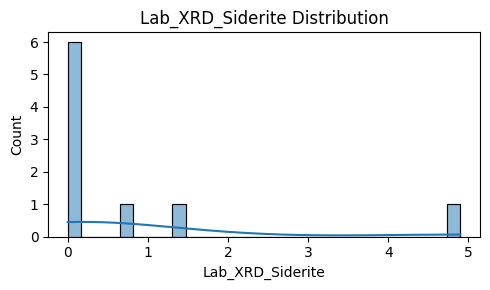

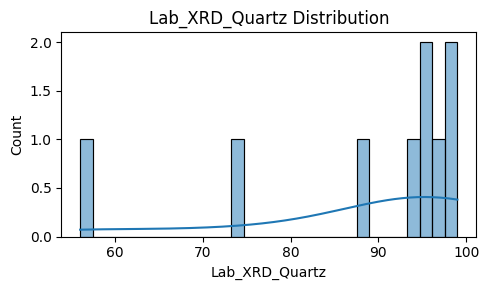

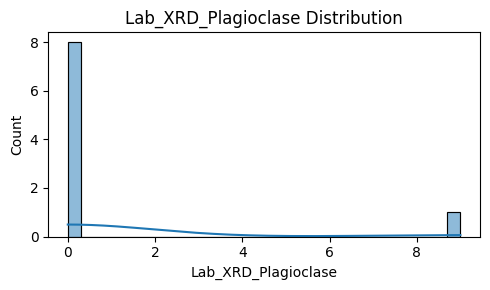

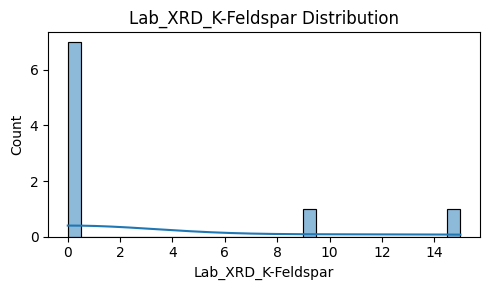

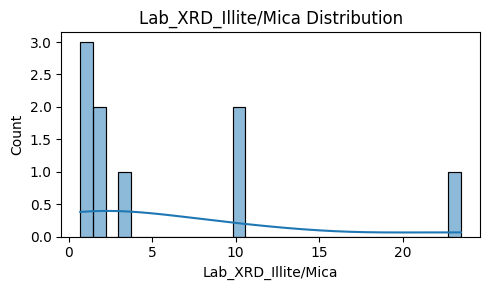

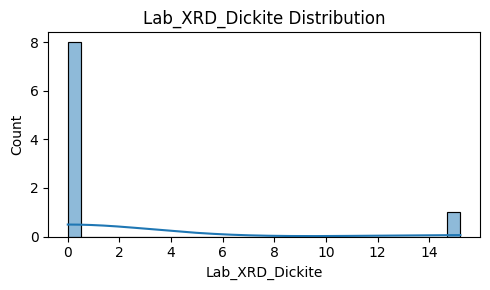

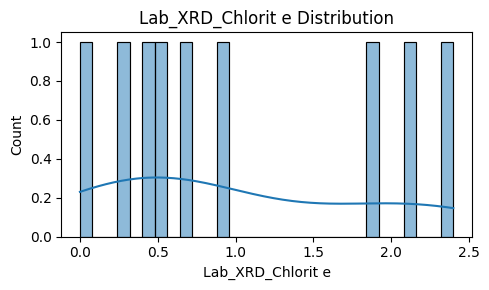

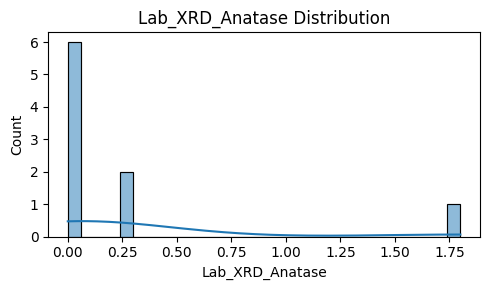

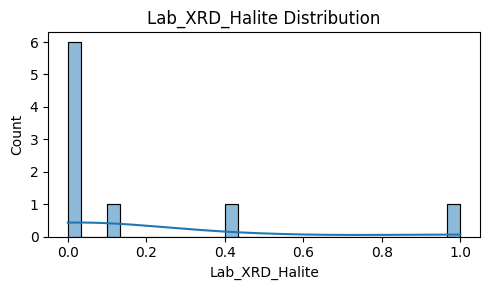

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in log_vars + lab_vars:
    plt.figure(figsize=(5,3))
    sns.histplot(joined[var].dropna(), bins=30, kde=True)
    plt.title(f"{var} Distribution")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


#  ANALYSIS


In [21]:
#  DATA VALIDATION 
def validate_petrophysical_data(log_df, lab_data):
    """Validate data quality from petrophysics perspective"""
    issues = []
    
    print("🔍 PETROPHYSICAL DATA VALIDATION:")
    print("=" * 40)
    
    # 1. Check for unrealistic log values
    if 'Log_GR' in log_df.columns:
        gr_issues = (log_df['Log_GR'] < 0) | (log_df['Log_GR'] > 500)
        if gr_issues.any():
            issues.append(f"GR values outside normal range: {gr_issues.sum()} samples")
            print(f"⚠️  GR range issues: {gr_issues.sum()} samples outside 0-500 API")
        else:
            print(f"✅ GR values: Normal range (0-500 API)")
    
    # 2. Check density values
    if 'Log_ZDEN' in log_df.columns:
        den_issues = (log_df['Log_ZDEN'] < 1.5) | (log_df['Log_ZDEN'] > 3.5)
        if den_issues.any():
            issues.append(f"Density values outside normal range: {den_issues.sum()} samples")
            print(f"⚠️  Density range issues: {den_issues.sum()} samples outside 1.5-3.5 g/cc")
        else:
            print(f"✅ Density values: Normal range (1.5-3.5 g/cc)")
    
    # 3. Validate XRD mineralogy totals
    xrd_cols = [col for col in lab_data.columns if 'XRD' in col]
    if xrd_cols:
        totals = lab_data[xrd_cols].sum(axis=1)
        problematic = (totals > 105) | (totals < 95)
        if problematic.any():
            issues.append(f"XRD mineral totals outside 95-105%: {problematic.sum()} samples")
            print(f"⚠️  XRD closure issues: {problematic.sum()} samples outside 95-105%")
        else:
            print(f"✅ XRD mineral totals: Good closure (95-105%)")
    
    # 4. Check for negative values in percentages
    percentage_cols = [col for col in lab_data.columns if any(x in col for x in ['XRD', 'XRF'])]
    for col in percentage_cols:
        if (lab_data[col] < 0).any():
            issues.append(f"Negative values in {col}")
            print(f"⚠️  Negative values found in {col}")
    
    print(f"\n📋 VALIDATION SUMMARY:")
    if not issues:
        print("✅ All validation checks passed!")
    else:
        print(f"❌ Found {len(issues)} data quality issues:")
        for issue in issues:
            print(f"   • {issue}")
    
    return issues

# Run validation
validation_issues = validate_petrophysical_data(log_df_clean, lab_data)

🔍 PETROPHYSICAL DATA VALIDATION:
⚠️  XRD closure issues: 1 samples outside 95-105%

📋 VALIDATION SUMMARY:
❌ Found 1 data quality issues:
   • XRD mineral totals outside 95-105%: 1 samples


📊 Creating efficient distribution visualizations...


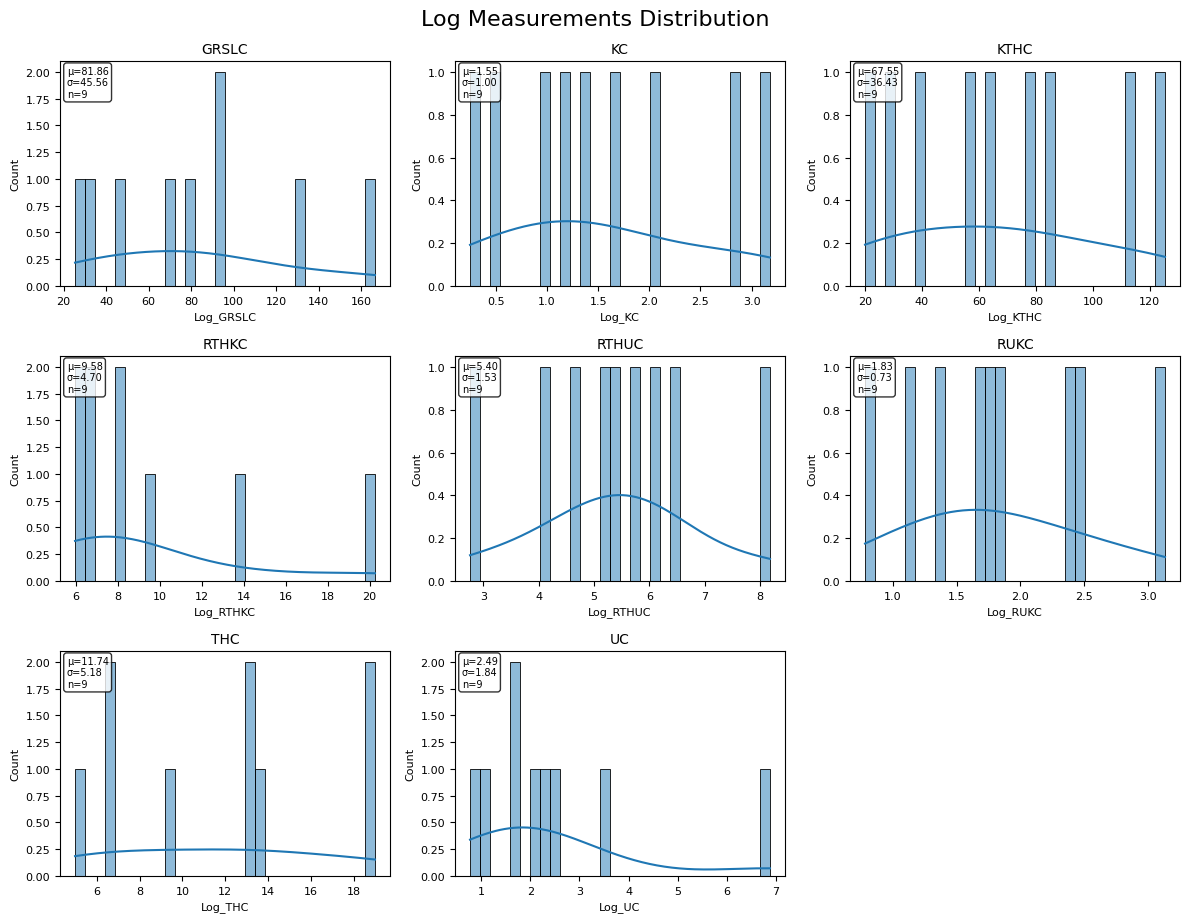

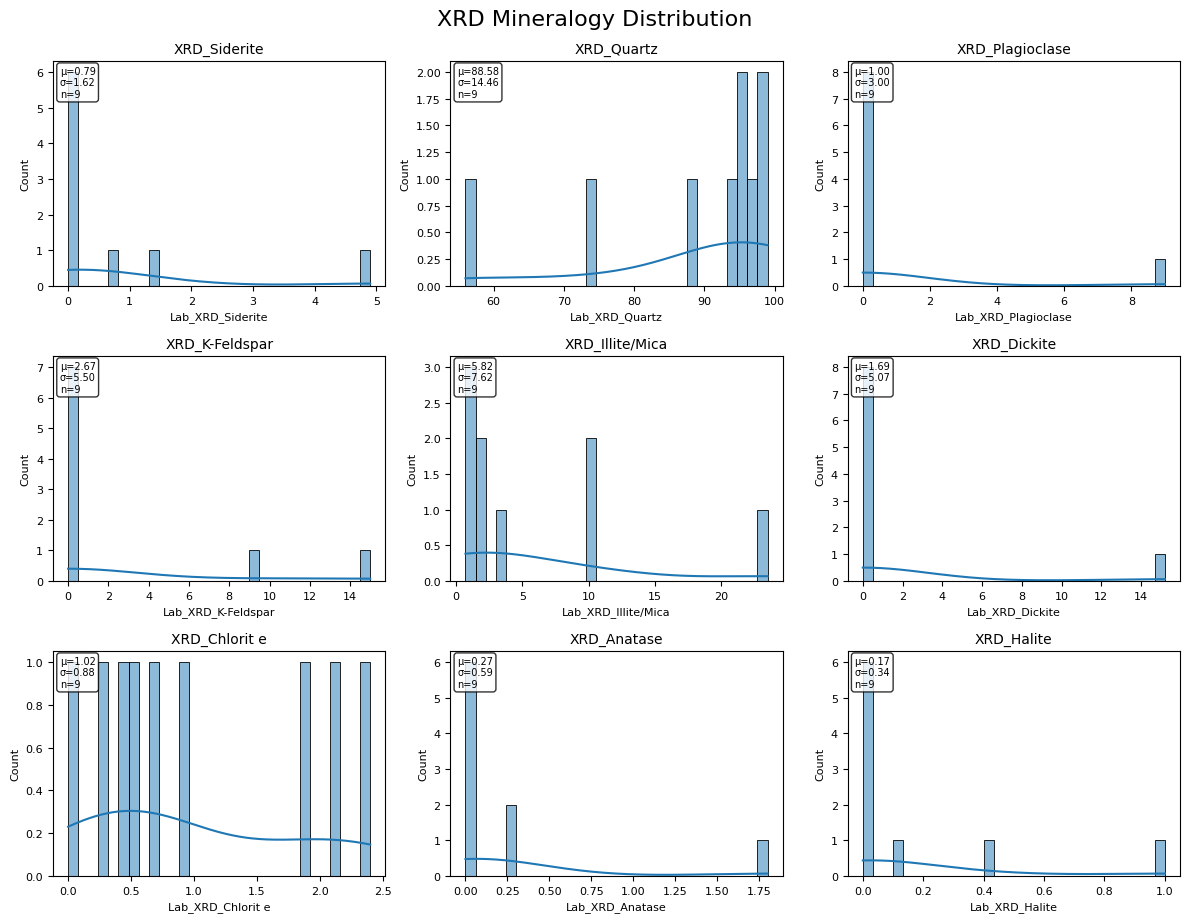

✅ Efficient visualizations completed and saved!


In [22]:
# This code provides efficient visualizations of the distributions of key log and lab variables.
# Instead of plotting each variable individually in a loop, it uses a grid layout to show multiple histograms at once.
# For each variable, it shows the distribution (histogram + KDE), summary statistics (mean, std, count), and handles missing data gracefully.
# It splits variables into logical groups (log measurements, XRD minerals, XRF elements) for easier interpretation.
# The resulting plots help you quickly assess the spread, central tendency, and potential outliers for each variable, supporting data quality review and exploratory analysis.

#  VISUALIZATIONS - Efficient grid plots instead of individual loops
def create_distribution_grid(data, variables, ncols=4, figsize_per_plot=(4, 3)):
    """Create efficient grid of distribution plots instead of individual loops"""
    
    n_vars = len(variables)
    nrows = (n_vars + ncols - 1) // ncols
    
    fig, axes = plt.subplots(nrows, ncols, 
                            figsize=(figsize_per_plot[0] * ncols, figsize_per_plot[1] * nrows))
    
    # Handle single row case
    if nrows == 1:
        axes = [axes] if ncols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(variables):
        if i < len(axes):
            # Clean data and create histogram
            clean_data = data[var].dropna()
            
            if len(clean_data) > 0:
                sns.histplot(clean_data, bins=30, kde=True, ax=axes[i])
                axes[i].set_title(f"{var.replace('Lab_', '').replace('Log_', '')}", fontsize=10)
                axes[i].set_xlabel(var, fontsize=8)
                axes[i].set_ylabel("Count", fontsize=8)
                axes[i].tick_params(labelsize=8)
                
                # Add statistics text
                axes[i].text(0.02, 0.98, 
                           f'μ={clean_data.mean():.2f}\nσ={clean_data.std():.2f}\nn={len(clean_data)}',
                           transform=axes[i].transAxes, fontsize=7, 
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            else:
                axes[i].text(0.5, 0.5, 'No Data', transform=axes[i].transAxes, 
                           ha='center', va='center', fontsize=12)
                axes[i].set_title(f"{var} (No Data)")
    
    # Hide empty subplots
    for i in range(n_vars, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    return fig

# Create efficient distribution plots
print("📊 Creating efficient distribution visualizations...")

# Split variables into logical groups for better visualization
log_measurement_vars = [v for v in log_vars if any(x in v for x in ['GR', 'ZDEN', 'CN', 'PE', 'U', 'TH', 'K'])]
lab_xrd_vars = [v for v in lab_vars if 'XRD' in v]
lab_xrf_vars = [v for v in lab_vars if 'XRF' in v]

# Create grouped visualizations
if log_measurement_vars:
    fig1 = create_distribution_grid(joined, log_measurement_vars, ncols=3)
    fig1.suptitle("Log Measurements Distribution", fontsize=16, y=1.02)
    plt.savefig('log_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

if lab_xrd_vars:
    fig2 = create_distribution_grid(joined, lab_xrd_vars, ncols=3)
    fig2.suptitle("XRD Mineralogy Distribution", fontsize=16, y=1.02)
    plt.savefig('xrd_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

if lab_xrf_vars:
    fig3 = create_distribution_grid(joined, lab_xrf_vars[:12], ncols=4)  # Limit to first 12 for readability
    fig3.suptitle("XRF Elements Distribution (Top 12)", fontsize=16, y=1.02)
    plt.savefig('xrf_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

print("✅ Efficient visualizations completed and saved!")

In [23]:
# ✅ ADVANCED ANALYTICS - Outlier detection and predictive modeling
def detect_outliers_iqr(data, columns=None):
    """Detect outliers using IQR method"""
    if columns is None:
        columns = data.select_dtypes(include=[np.number]).columns
    
    outlier_summary = {}
    outlier_indices = set()
    
    print("🔍 OUTLIER DETECTION (IQR Method):")
    print("=" * 40)
    
    for col in columns:
        if col in data.columns and data[col].notna().sum() > 4:  # Need at least 5 values
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            
            if IQR > 0:  # Avoid division by zero
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
                outlier_indices.update(outliers.index)
                
                if len(outliers) > 0:
                    outlier_summary[col] = {
                        'count': len(outliers),
                        'percentage': (len(outliers) / len(data)) * 100,
                        'lower_bound': lower_bound,
                        'upper_bound': upper_bound,
                        'outlier_indices': outliers.index.tolist()
                    }
                    print(f"⚠️  {col}: {len(outliers)} outliers ({outlier_summary[col]['percentage']:.1f}%)")
                else:
                    print(f"✅ {col}: No outliers detected")
    
    print(f"\n📊 OUTLIER SUMMARY:")
    print(f"   • Total samples with outliers: {len(outlier_indices)}")
    print(f"   • Variables with outliers: {len(outlier_summary)}")
    
    return outlier_summary, list(outlier_indices)

def validate_log_lab_predictions(data, target_lab_var, predictor_log_vars, test_size=0.2):
    """Cross-validate log-to-lab predictions using random forest"""
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score, mean_absolute_error
    
    print(f"\n🎯 PREDICTIVE MODELING: {target_lab_var}")
    print("=" * 50)
    
    # Prepare data
    available_predictors = [col for col in predictor_log_vars if col in data.columns]
    
    if len(available_predictors) == 0:
        print("❌ No predictor variables available")
        return None
    
    # Create feature matrix and target
    X = data[available_predictors].fillna(data[available_predictors].mean())
    y = data[target_lab_var].fillna(data[target_lab_var].mean())
    
    # Remove samples where target is still NaN
    valid_mask = ~y.isna()
    X = X[valid_mask]
    y = y[valid_mask]
    
    if len(X) < 10:
        print(f"❌ Insufficient data: only {len(X)} valid samples")
        return None
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Results
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': available_predictors,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"📊 PREDICTION RESULTS:")
    print(f"   • Training samples: {len(X_train)}")
    print(f"   • Test samples: {len(X_test)}")
    print(f"   • Test R²: {test_r2:.3f}")
    print(f"   • Test MAE: {test_mae:.3f}")
    print(f"   • CV R² (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    
    print(f"\n🔝 TOP PREDICTOR FEATURES:")
    for _, row in feature_importance.head(5).iterrows():
        print(f"   • {row['feature']}: {row['importance']:.3f}")
    
    return {
        'model': model,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'cv_scores': cv_scores,
        'feature_importance': feature_importance,
        'predictions': y_pred,
        'actual': y_test
    }

# Run outlier detection
print("Running outlier detection on key variables...")
key_vars_for_outliers = log_vars[:5] + lab_vars[:5]  # Limit to key variables
outlier_summary, outlier_indices = detect_outliers_iqr(joined, key_vars_for_outliers)

# Example predictive modeling (if we have suitable variables)
if 'Lab_XRD_Quartz' in joined.columns and len(log_vars) > 0:
    quartz_prediction = validate_log_lab_predictions(
        joined, 
        'Lab_XRD_Quartz', 
        [v for v in log_vars if v in joined.columns][:5]  # Use top 5 log variables
    )

Running outlier detection on key variables...
🔍 OUTLIER DETECTION (IQR Method):
⚠️  Log_GRSLC: 1 outliers (11.1%)
✅ Log_KC: No outliers detected
✅ Log_KTHC: No outliers detected
⚠️  Log_RTHKC: 1 outliers (11.1%)
✅ Log_RTHUC: No outliers detected
⚠️  Lab_XRD_Siderite: 1 outliers (11.1%)
⚠️  Lab_XRD_Quartz: 2 outliers (22.2%)
✅ Lab_XRD_Illite/Mica: No outliers detected

📊 OUTLIER SUMMARY:
   • Total samples with outliers: 4
   • Variables with outliers: 4



🎯 PREDICTIVE MODELING: Lab_XRD_Quartz
❌ Insufficient data: only 9 valid samples



📊 CREATING MINERAL COMPOSITION CHART...


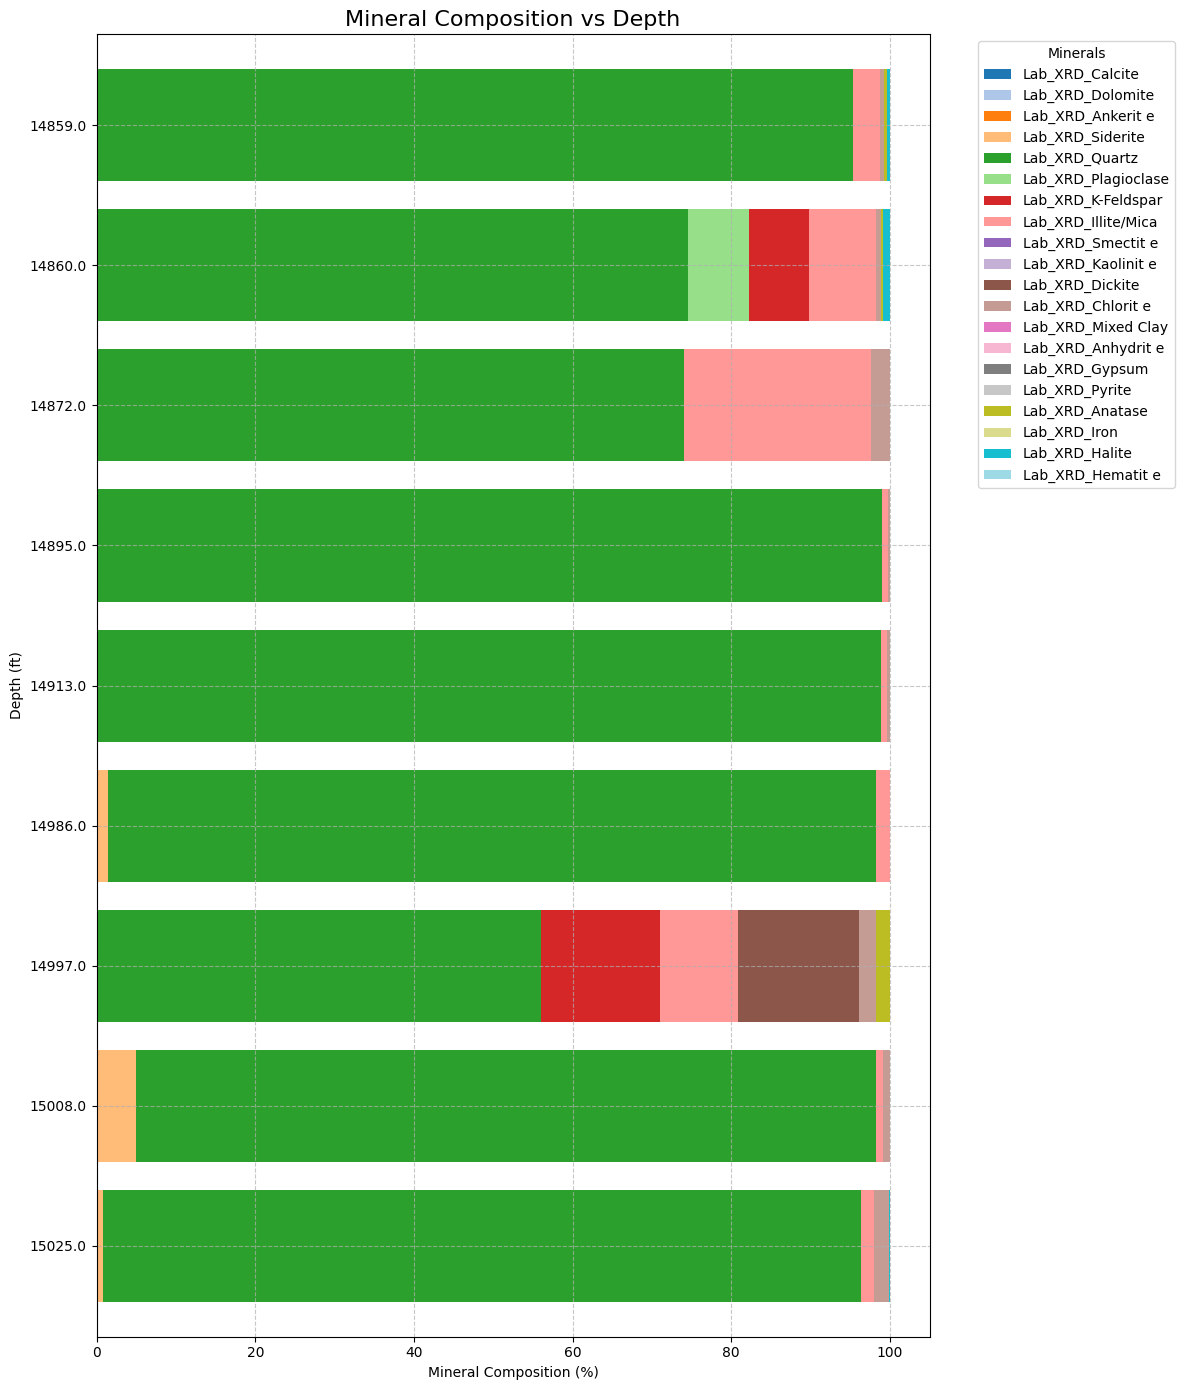


📊 CREATING DEPTH TREND PLOTS...


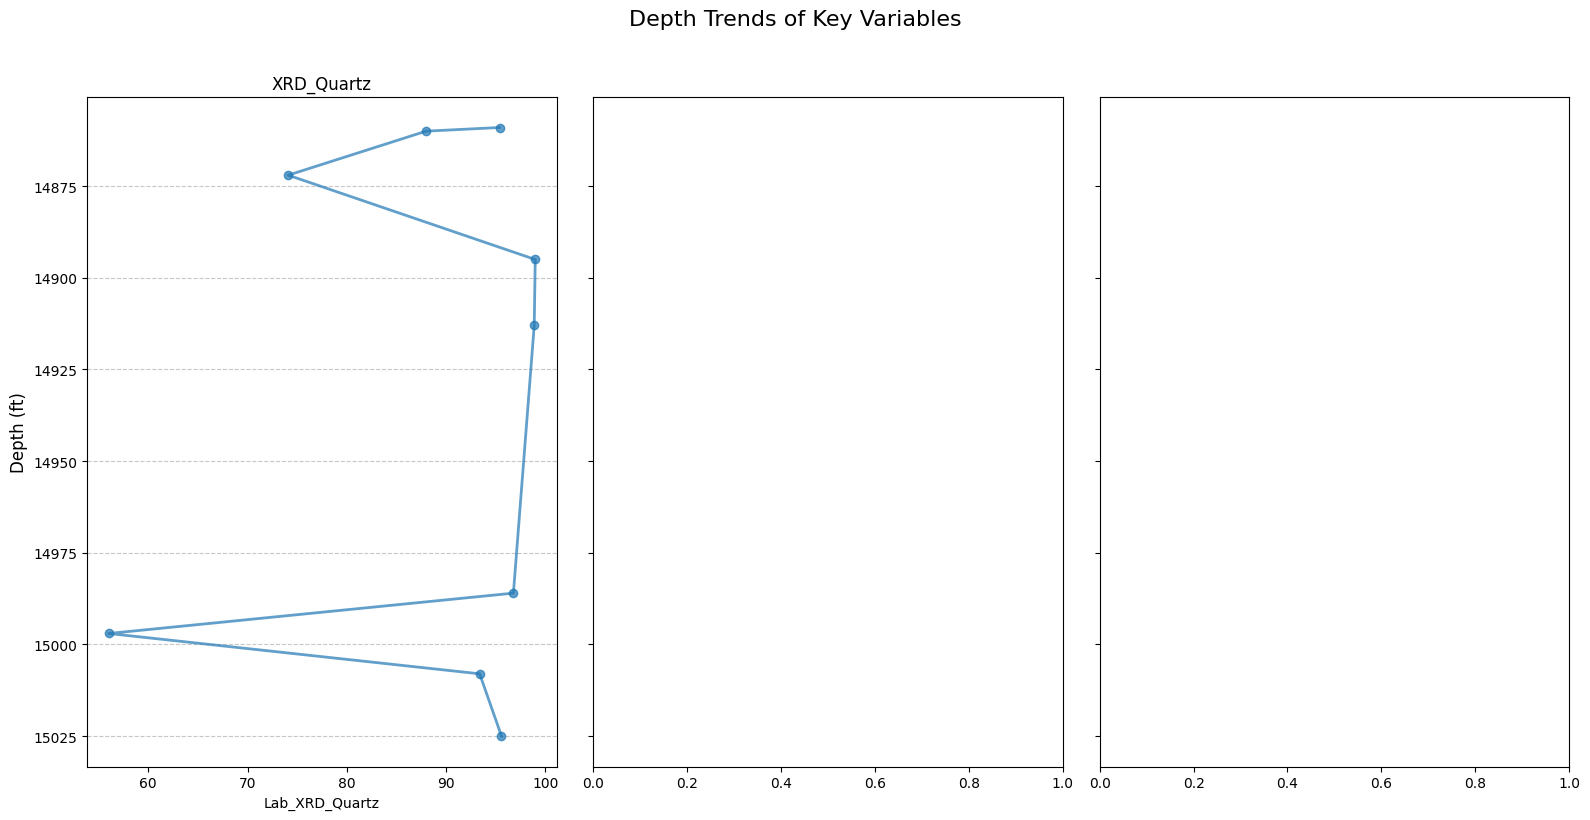


📊 CREATING MINERAL PAIRPLOTS...


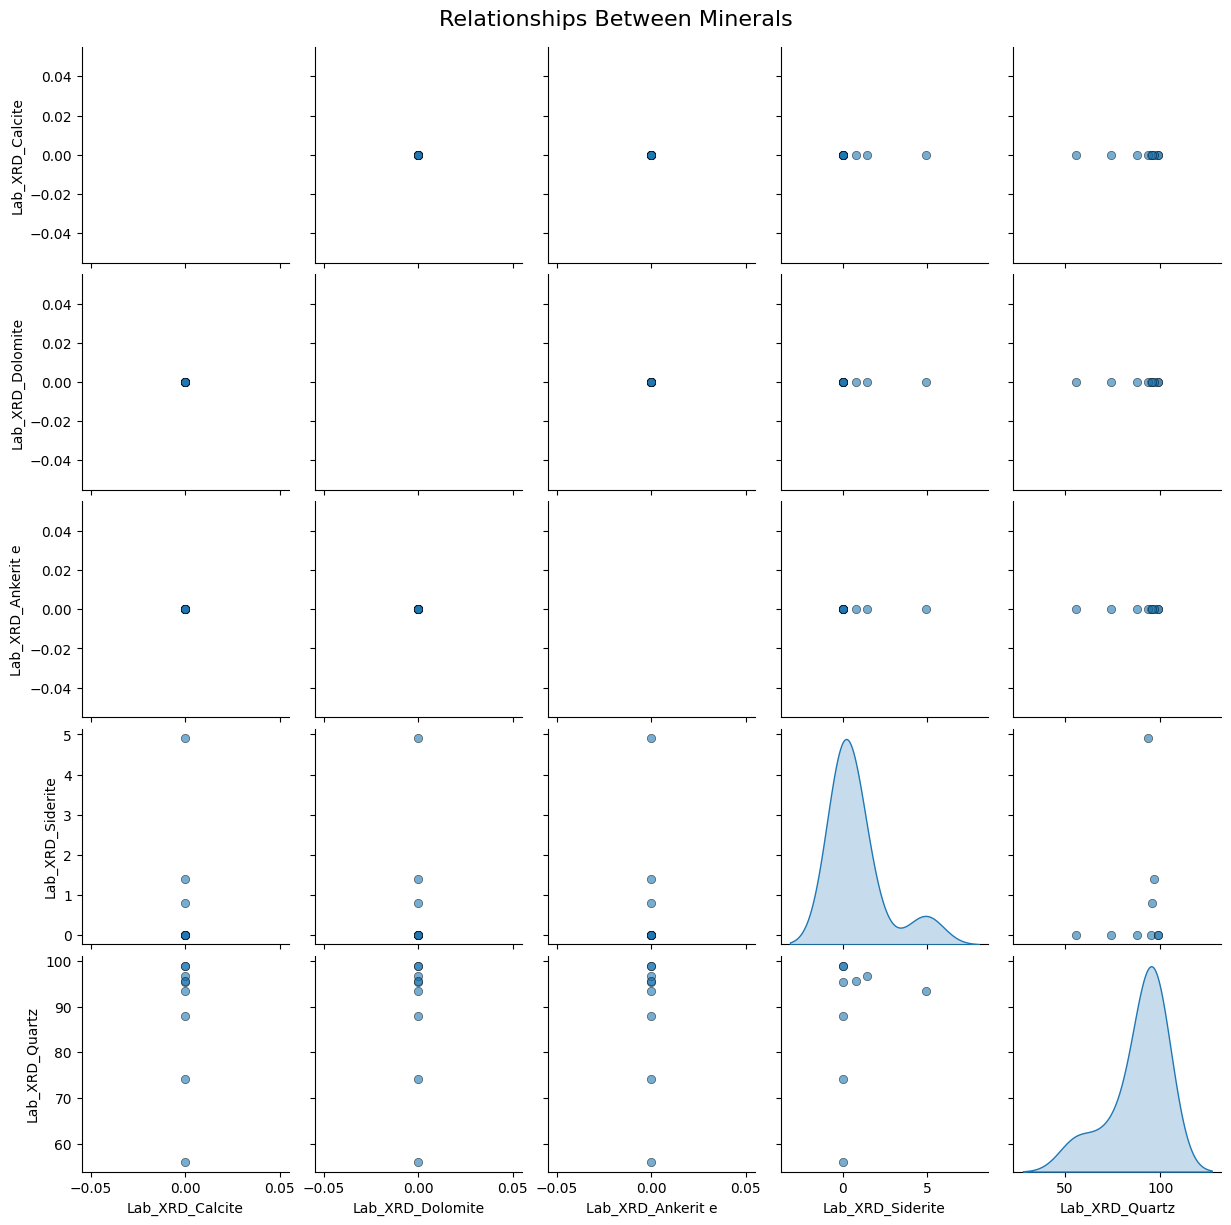


📊 CREATING COMPOSITE LOG PLOT...


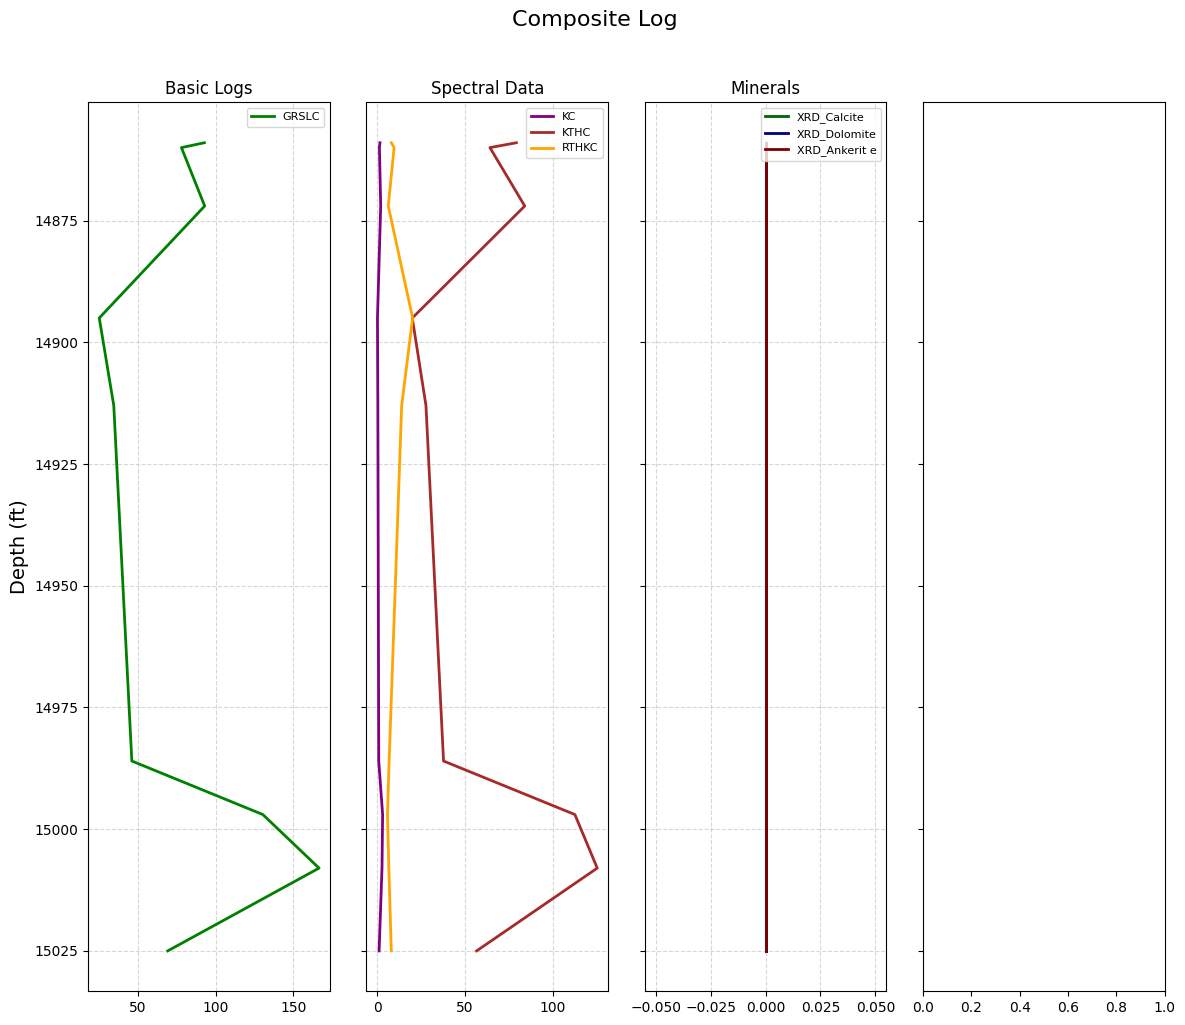


✅ ALL VISUALIZATIONS CREATED AND SAVED!


In [25]:
# ADVANCED VISUALIZATIONS - Scatter Plots for Log vs Lab Data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def create_mineral_composition_bar(data, mineral_columns):
    """Create stacked bar chart of mineral composition by depth"""
    
    # Sort by depth for proper stratigraphic order (deepest at bottom)
    plot_data = data.sort_values('Lab_Depth', ascending=False)
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 14))
    
    # Filter to only include specified mineral columns and ensure they sum to 100%
    minerals_data = plot_data[mineral_columns].copy()
    
    # Normalize each row to sum to 100%
    row_sums = minerals_data.sum(axis=1)
    normalized_data = minerals_data.div(row_sums, axis=0) * 100
    
    # Create stacked horizontal bar chart
    normalized_data.plot(kind='barh', stacked=True, ax=ax, width=0.8,
                         colormap='tab20')
    
    # Add depth labels on y-axis
    ax.set_yticks(range(len(plot_data)))
    ax.set_yticklabels([f"{d:.1f}" for d in plot_data['Lab_Depth']])
    
    # Customize plot
    ax.set_xlabel('Mineral Composition (%)')
    ax.set_ylabel('Depth (ft)')
    ax.set_title('Mineral Composition vs Depth', fontsize=16)
    plt.legend(title='Minerals', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('mineral_composition_vs_depth.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

# def create_log_vs_mineral_scatterplots(data, log_vars, mineral_vars, n_cols=3):
    """Create a grid of scatterplots comparing log measurements to mineral content"""
    
    # Find all combinations with correlation coefficients
    correlations = []
    for log_var in log_vars:
        for mineral_var in mineral_vars:
            if log_var in data.columns and mineral_var in data.columns:
                valid_data = data[[log_var, mineral_var]].dropna()
                if len(valid_data) >= 5:  # Need at least 5 points for meaningful correlation
                    corr = valid_data.corr().iloc[0, 1]
                    correlations.append((log_var, mineral_var, corr, len(valid_data)))
    
    # Sort by absolute correlation (strongest first)
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Select top correlations (up to 9 plots)
    top_correlations = correlations[:9]
    
    if not top_correlations:
        print("❌ No valid correlations found with sufficient data points")
        return None
    
    # Determine grid size
    n_plots = len(top_correlations)
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    # Create scatterplots
    for i, (log_var, mineral_var, corr, n) in enumerate(top_correlations):
        if i < len(axes):
            # Clean and prepare data
            plot_data = data[[log_var, mineral_var, 'Distance']].dropna()
            
            # Color by match distance quality
            scatter = axes[i].scatter(plot_data[log_var], plot_data[mineral_var], 
                          c=plot_data['Distance'], cmap='viridis_r',
                          alpha=0.8, s=50, edgecolor='k', linewidth=0.5)
            
            # Add trend line
            sns.regplot(x=log_var, y=mineral_var, data=plot_data, 
                        scatter=False, ax=axes[i], color='red', line_kws={'linewidth': 2})
            
            # Add correlation text
            axes[i].text(0.05, 0.95, f'r = {corr:.2f}\nn = {n}', 
                      transform=axes[i].transAxes, fontsize=12,
                      verticalalignment='top', 
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Customize plot
            axes[i].set_title(f'{log_var.replace("Log_", "")} vs {mineral_var.replace("Lab_", "")}')
            axes[i].set_xlabel(log_var)
            axes[i].set_ylabel(mineral_var)
            axes[i].grid(True, linestyle='--', alpha=0.3)
    
    # Hide unused subplots
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)
    
    # Add colorbar for match distance
    if n_plots > 0:
        cbar = fig.colorbar(scatter, ax=axes, pad=0.01)
        cbar.set_label('Match Distance (ft)')
    
    plt.tight_layout()
    plt.savefig('log_vs_mineral_scatterplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def create_depth_trend_plots(data, variables, n_cols=3):
    """Create depth trend plots for selected variables"""
    
    n_vars = len(variables)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(1, n_cols, figsize=(16, 8), sharey=True)
    if n_cols == 1:
        axes = [axes]
    
    # Sort by depth for proper stratigraphic order (deepest at bottom)
    plot_data = data.sort_values('Lab_Depth')
    
    # Common y-axis (depth)
    depth = plot_data['Lab_Depth']
    
    # Color palette
    colors = plt.cm.tab10.colors
    
    for i, var in enumerate(variables[:n_cols]):
        if var in plot_data.columns:
            # Get clean data
            var_data = plot_data[var].values
            
            # Create line plot
            axes[i].plot(var_data, depth, 'o-', color=colors[i % len(colors)], 
                        markersize=6, linewidth=2, alpha=0.7)
            
            # Add horizontal grid lines
            axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
            
            # Add labels
            axes[i].set_title(var.replace('Lab_', '').replace('Log_', ''), fontsize=12)
            axes[i].set_xlabel(var, fontsize=10)
            
            # Invert y-axis for depth (top at top)
            axes[i].invert_yaxis()
    
    # Set common y label only on leftmost plot
    axes[0].set_ylabel('Depth (ft)', fontsize=12)
    
    # Add main title
    fig.suptitle('Depth Trends of Key Variables', fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.savefig('depth_trend_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

def create_mineral_pairplots(data, mineral_vars, color_var=None):
    """Create pairplots for mineral relationships with optional coloring"""
    
    # Subset data to selected variables
    plot_data = data[mineral_vars].copy()
    
    # Add a color variable if specified
    if color_var and color_var in data.columns:
        plot_data[color_var] = data[color_var]
        
        # Create pairplot with coloring
        g = sns.pairplot(plot_data, diag_kind='kde', 
                         plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                         hue=color_var)
    else:
        # Create pairplot without coloring
        g = sns.pairplot(plot_data, diag_kind='kde', 
                         plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5})
    
    # Adjust title and layout
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle('Relationships Between Minerals', fontsize=16)
    
    plt.savefig('mineral_pairplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return g

def create_composite_log_plot(data, log_vars, label_cols=None):
    """Create a composite log plot with multiple tracks"""
    
    # Sort by depth
    plot_data = data.sort_values('Lab_Depth')
    
    # Set up tracks (columns of plots)
    n_tracks = min(4, len(log_vars) // 2 + 1)  # At most 4 tracks
    
    # Create figure
    fig, axes = plt.subplots(1, n_tracks, figsize=(3*n_tracks, 10), sharey=True)
    if n_tracks == 1:
        axes = [axes]
    
    # Depth data
    depth = plot_data['Lab_Depth']
    
    # Customize each track
    # Track 1: Basic measurements (GR, density)
    basic_logs = [var for var in log_vars if any(x in var for x in ['GR', 'ZDEN', 'PE'])]
    if basic_logs and len(basic_logs) > 0:
        ax = axes[0]
        
        # Multiple curves on same track with different colors
        for i, log in enumerate(basic_logs[:3]):  # Limit to 3 curves per track
            if log in plot_data.columns:
                color = ['green', 'red', 'blue'][i % 3]
                ax.plot(plot_data[log], depth, label=log.replace('Log_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Basic Logs', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.invert_yaxis()  # Depth increases downward
    
    # Track 2: Spectral data
    spectral_logs = [var for var in log_vars if any(x in var for x in ['K', 'U', 'TH'])]
    if len(spectral_logs) > 0 and len(axes) > 1:
        ax = axes[1]
        
        for i, log in enumerate(spectral_logs[:3]):
            if log in plot_data.columns:
                color = ['purple', 'brown', 'orange'][i % 3]
                ax.plot(plot_data[log], depth, label=log.replace('Log_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Spectral Data', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Track 3: Lab data if available
    mineral_vars = [var for var in data.columns if 'XRD' in var][:3]
    if len(mineral_vars) > 0 and len(axes) > 2:
        ax = axes[2]
        
        for i, mineral in enumerate(mineral_vars):
            if mineral in plot_data.columns:
                color = ['darkgreen', 'navy', 'maroon'][i % 3]
                ax.plot(plot_data[mineral], depth, label=mineral.replace('Lab_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Minerals', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Additional track if needed
    other_logs = [var for var in log_vars if not any(x in var for x in ['GR', 'ZDEN', 'PE', 'K', 'U', 'TH'])][:3]
    if len(other_logs) > 0 and len(axes) > 3:
        ax = axes[3]
        
        for i, log in enumerate(other_logs):
            if log in plot_data.columns:
                color = ['teal', 'magenta', 'gold'][i % 3]
                ax.plot(plot_data[log], depth, label=log.replace('Log_', ''), 
                       color=color, linewidth=2)
        
        ax.set_title('Other Logs', fontsize=12)
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Set common y label only on leftmost plot
    axes[0].set_ylabel('Depth (ft)', fontsize=14)
    
    # Add labels if provided
    if label_cols:
        # Find label positions at regular intervals
        label_positions = np.linspace(depth.min(), depth.max(), 10)
        
        for label_col in label_cols:
            if label_col in plot_data.columns:
                for pos in label_positions:
                    # Find nearest sample
                    idx = (plot_data['Lab_Depth'] - pos).abs().idxmin()
                    label_text = f"{plot_data.loc[idx, label_col]:.1f}"
                    
                    # Add label to all tracks
                    for ax in axes:
                        ax.text(0.95, pos, label_text, transform=ax.get_yaxis_transform(),
                               verticalalignment='center', horizontalalignment='right',
                               fontsize=8, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    # Add title
    fig.suptitle('Composite Log', fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.savefig('composite_log_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

# Define mineral variables (XRD columns)
mineral_vars = [col for col in joined.columns if 'XRD' in col]

# Define log variables
log_vars = [col for col in joined.columns if col.startswith('Log_') and 
           col not in ['Log_Depth', 'Log_FRAMENO']]

# 1. Create mineral composition bar chart
print("\n📊 CREATING MINERAL COMPOSITION CHART...")
if len(mineral_vars) >= 3:
    create_mineral_composition_bar(joined, mineral_vars)

# 2. Create scatterplots comparing log measurements to mineral content
# print("\n📊 CREATING LOG VS MINERAL SCATTERPLOTS...")
# create_log_vs_mineral_scatterplots(joined, log_vars, mineral_vars)

# 3. Create depth trend plots for selected variables
print("\n📊 CREATING DEPTH TREND PLOTS...")
key_vars = ['Log_GR', 'Log_ZDEN', 'Lab_XRD_Quartz']
key_vars = [var for var in key_vars if var in joined.columns]
if len(key_vars) >= 1:
    create_depth_trend_plots(joined, key_vars)

# 4. Create mineral pairplots (limit to 3-5 minerals for readability)
print("\n📊 CREATING MINERAL PAIRPLOTS...")
if len(mineral_vars) >= 3:
    selected_minerals = mineral_vars[:5]  # Take top 5 minerals
    create_mineral_pairplots(joined, selected_minerals, color_var='Log_GR')

# 5. Create composite log plot
print("\n📊 CREATING COMPOSITE LOG PLOT...")
create_composite_log_plot(joined, log_vars)

print("\n✅ ALL VISUALIZATIONS CREATED AND SAVED!")